# DataMadness 2023: Ultimate Simpsons Guide

By Jan Grapenthin, Nikola Prianikov, Michael Balzer

## Part 0: Motivation

In this #DataMadness project we want to explore the Simpsons TV show by attempting to answer the following questions:
- Which guest speaker is the funniest?
- How does speaking time of characters changes over seasons?
- How does demographics influence the rating?
- What features have the most impact on rating?

The results can be used by potential viewers to guide them on which episodes to watch and which features to look out for and, hopefully, will be greatly appreciated by the Simpsons fans, as several interesting insights were found.

## Part 1: Data retrieving and Scrapping

Three main sources of data come from the following:
1. https://data.world/data-society/the-simpsons-by-the-data
    - Original dataset on top of which we built our own. Key features that are utilized are the script lines per character for the first 600 episodes.
2. https://www.imdb.com/title/tt0096697/
    - From here we extract demographics voting data per episode.
3. https://simpsons.fandom.com/wiki/
    - Simpsons fandom wiki has a page for each episode with a lot of interesting features that we extract.

### What features did we add

From IMDB:
* Ratings by demographics per episode

From fandom wiki box of each episode page:
* main_character(s)
* blackboardText
* couchGag
* specialGuestVoices
* Show Runner
* Written By
* Directed By

From fandom wiki References page of each episode:
* Cultural references
* Goofs
* Errors
* Self-References

It was decided to simply count number of the latter 4 features per episode, since raw textual data would not be very useful in our analysis.

### Scraping process

Scraping code can be found in the ./scraping_scripts folder. To run scraper yourself use run_scraper.py. At the moment of March 2023 specified above web-sources allow scraping without any restrictions. (For pages we were interested in the robot.txt file was checked)

## Part 2: Exploratory Data Analysis

### 2.1 Exploring influence of demographics on rating

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [366]:
demographics = pd.read_csv('./Datasets/scraped/voting_demographics.csv')

demographics.describe()
demographics.columns

Index(['Unnamed: 0', 'season', 'episode', 'total_counts', 'total_rating',
       '<18_counts', '<18_rating', '18-29_counts', '18-29_rating',
       '30-44_counts', '30-44_rating', '45+_counts', '45+_rating',
       'male_counts', 'male_rating', 'male_<18_counts', 'male_<18_rating',
       'male_18-29_counts', 'male_18-29_rating', 'male_30-44_counts',
       'male_30-44_rating', 'male_45+_counts', 'male_45+_rating',
       'female_counts', 'female_rating', 'female_<18_counts',
       'female_<18_rating', 'female_18-29_counts', 'female_18-29_rating',
       'female_30-44_counts', 'female_30-44_rating', 'female_45+_counts',
       'female_45+_rating', 'top1000_counts', 'top1000_rating',
       'us_users_counts', 'us_users_rating', 'non-us_users_counts',
       'non-us_users_rating'],
      dtype='object')

<Axes: ylabel='Density'>

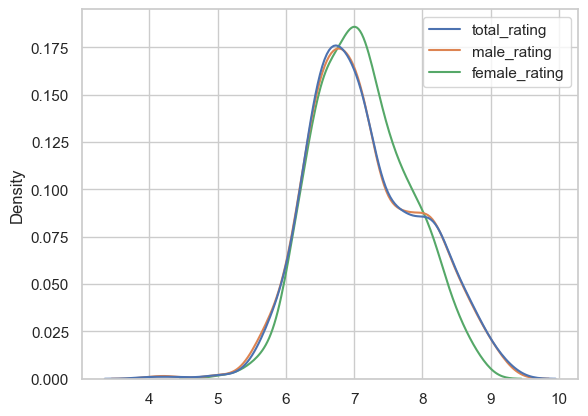

In [367]:
sns.kdeplot(data=[demographics['total_rating'], demographics['male_rating'], demographics['female_rating']], legend=True)


Females give higher ratings on average, indication of much less female voters than male voters since male curve follows total curve accurately while female curve is off.

<Axes: ylabel='Density'>

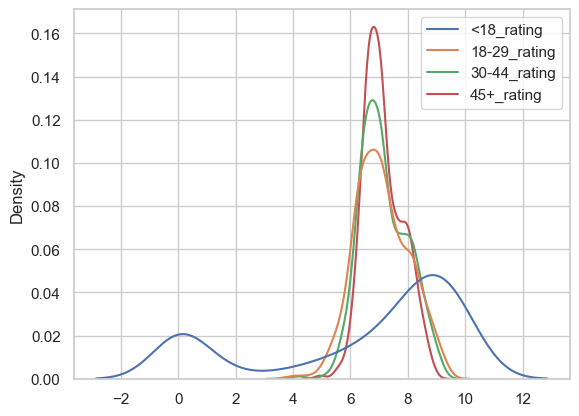

In [368]:
sns.kdeplot(data=[demographics['<18_rating'], demographics['18-29_rating'], demographics['30-44_rating'],demographics['45+_rating']])

The only age group that seems to behave significantly different is the age group <18, which indicates that there is no real influence of the age on voting behavior.

<Axes: ylabel='Density'>

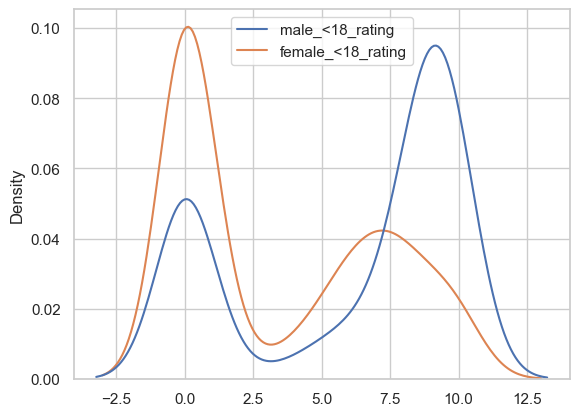

In [369]:
sns.kdeplot(data=[demographics['male_<18_rating'], demographics['female_<18_rating']])

Female voters seem to give mostly bad rating while male voters give mostly good ratings, and the ratings overall just split into two main extremes.

<Axes: ylabel='Density'>

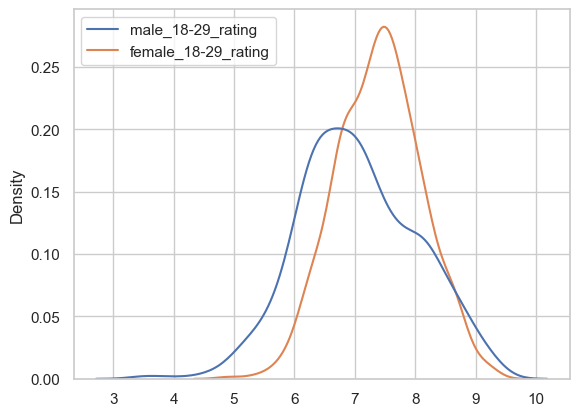

In [370]:
sns.kdeplot(data=[demographics['male_18-29_rating'], demographics['female_18-29_rating']])

As the age progresses the voting behavior seems to unify

<Axes: ylabel='Density'>

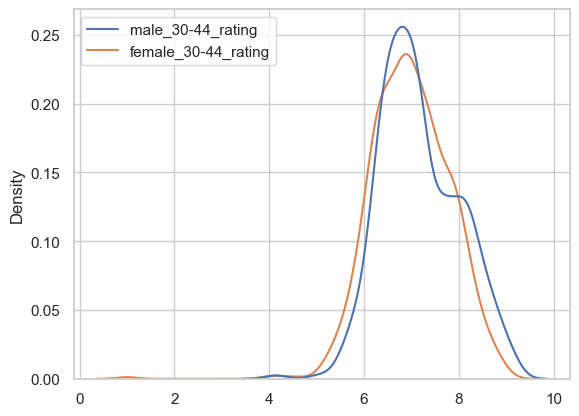

In [371]:
sns.kdeplot(data=[demographics['male_30-44_rating'], demographics['female_30-44_rating']])

Even more similar

<Axes: ylabel='Density'>

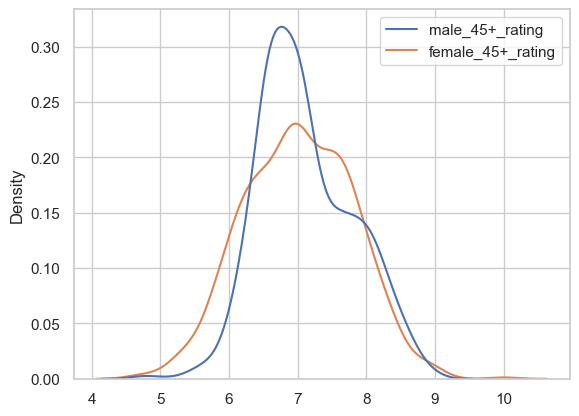

In [372]:
sns.kdeplot(data=[demographics['male_45+_rating'], demographics['female_45+_rating']])

For 45+ the female behavior changes again, possibly due to a difference in population size

<Axes: xlabel='Unnamed: 0'>

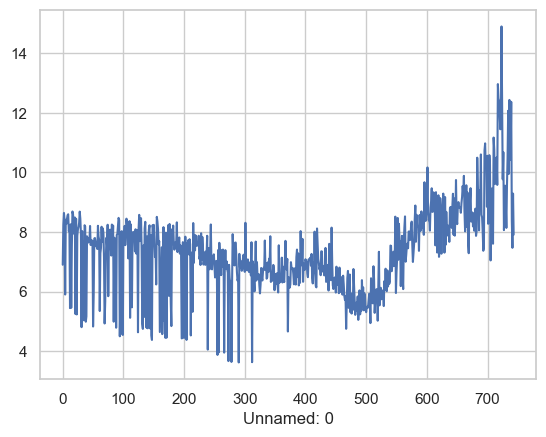

In [373]:
sns.lineplot(x=demographics['Unnamed: 0'], y=demographics['male_counts']/demographics['female_counts'])

As suspected male voter audience 4 to 15 times larger than the female voting audience.

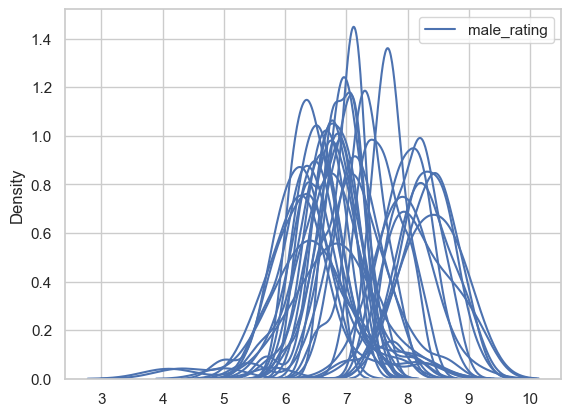

In [374]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'male_rating']])

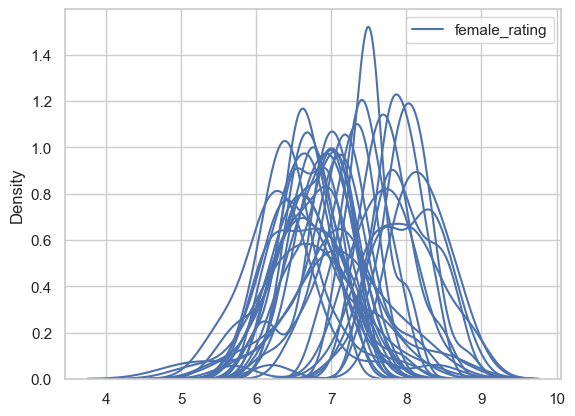

In [375]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'female_rating']])

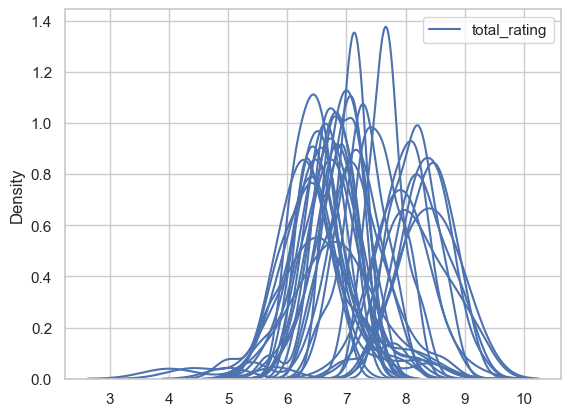

In [376]:
for season in demographics['season'].value_counts().keys():
    sns.kdeplot(data=[demographics.loc[demographics['season'] == season, 'total_rating']])

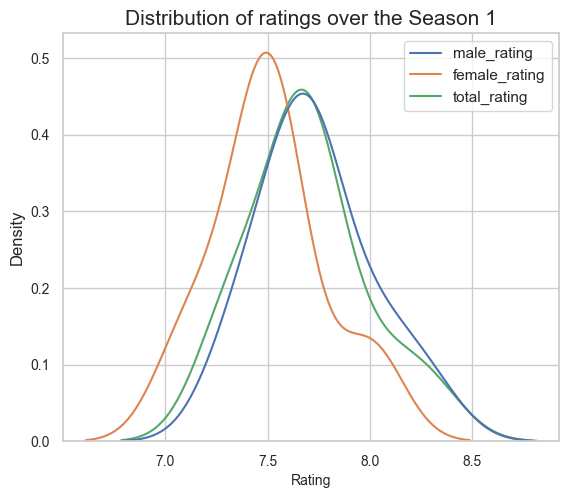

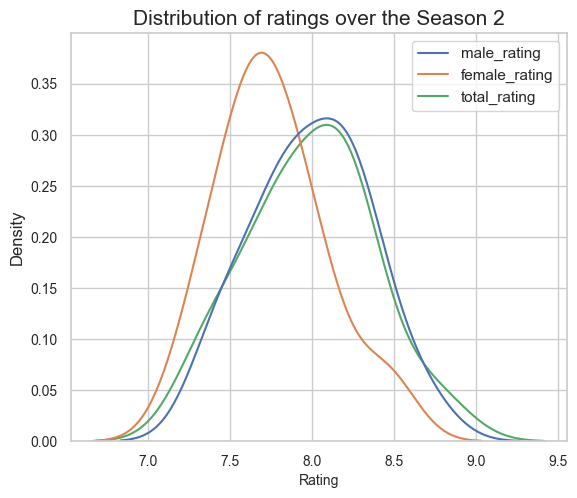

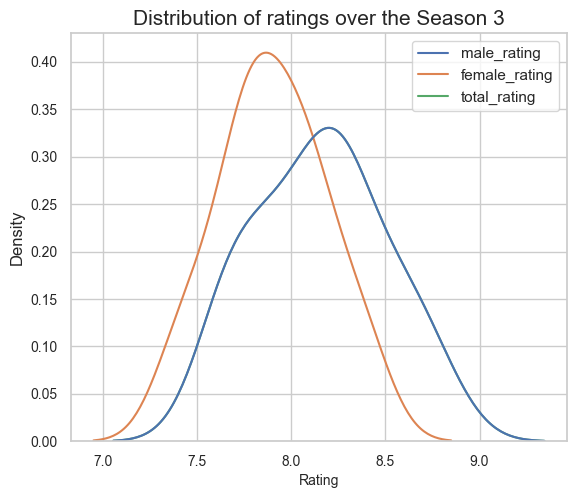

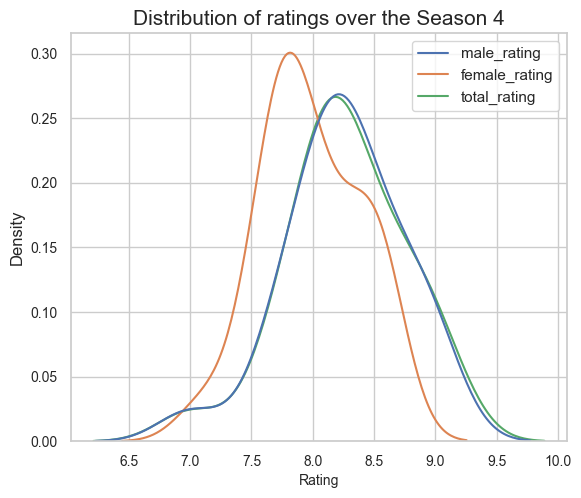

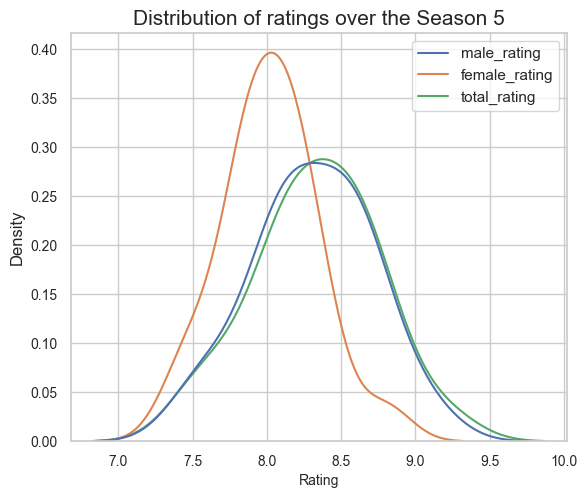

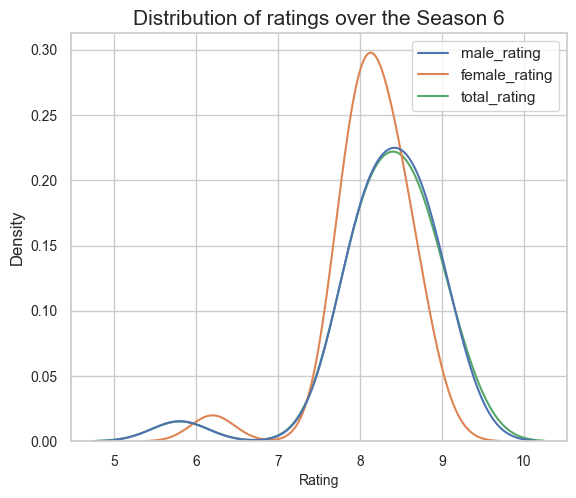

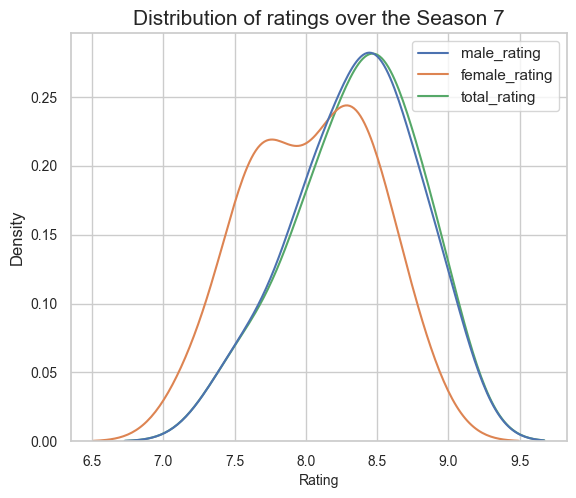

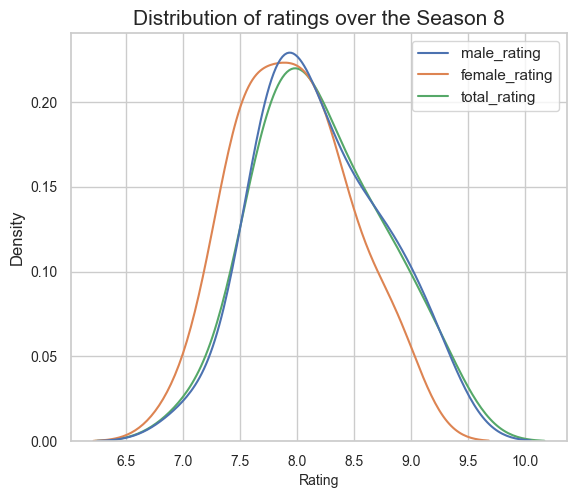

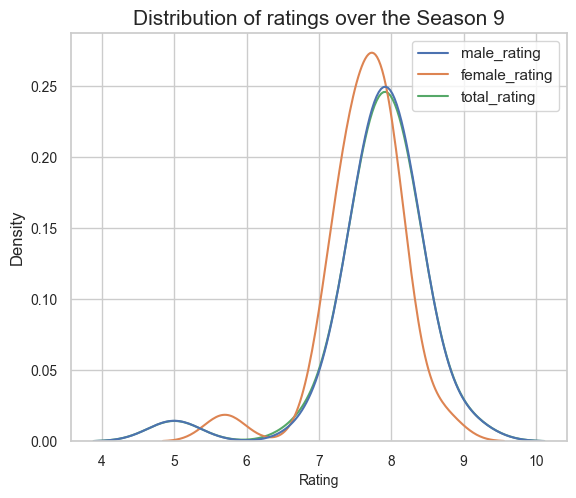

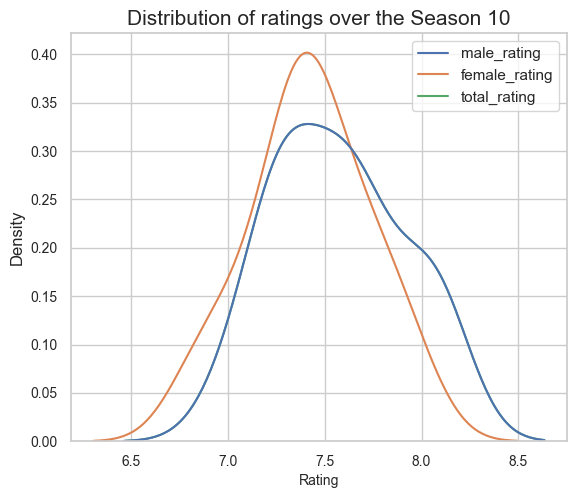

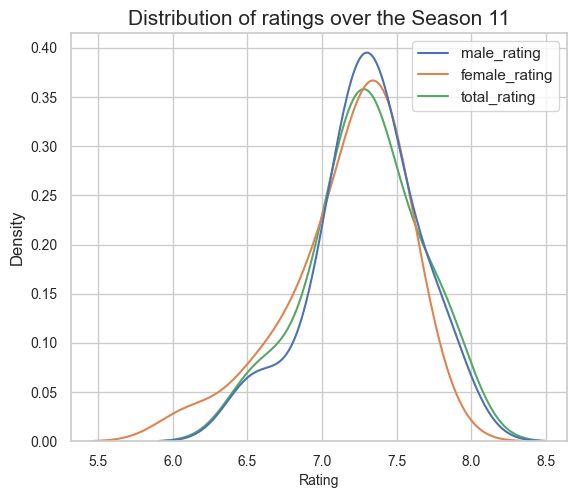

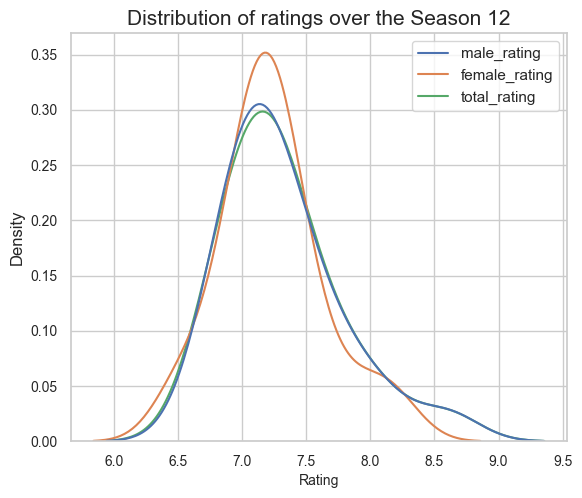

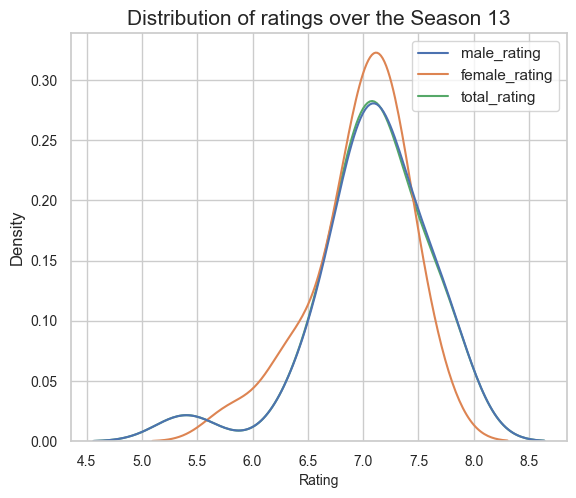

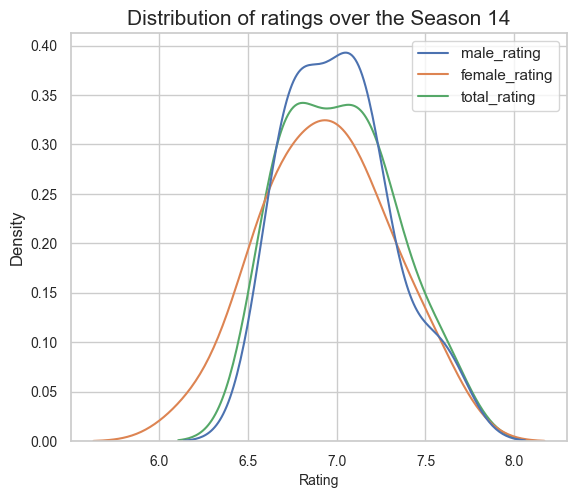

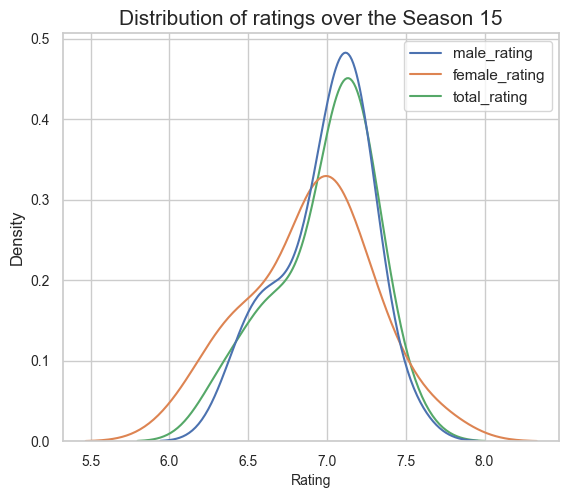

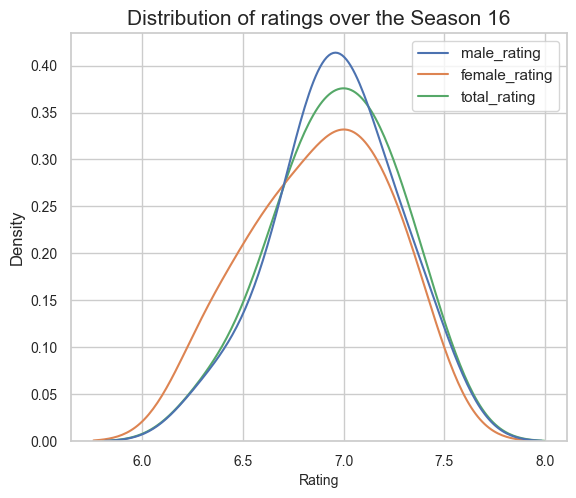

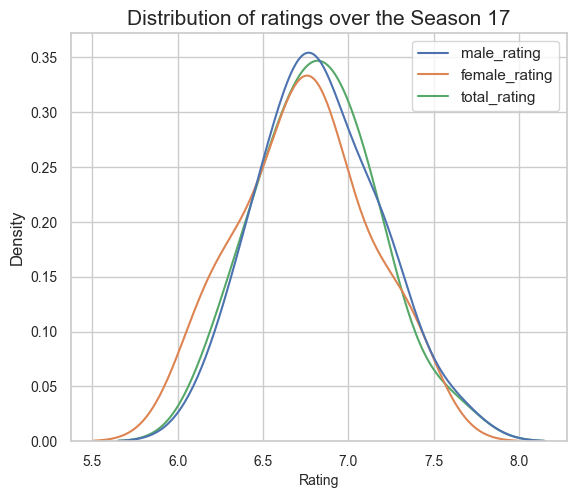

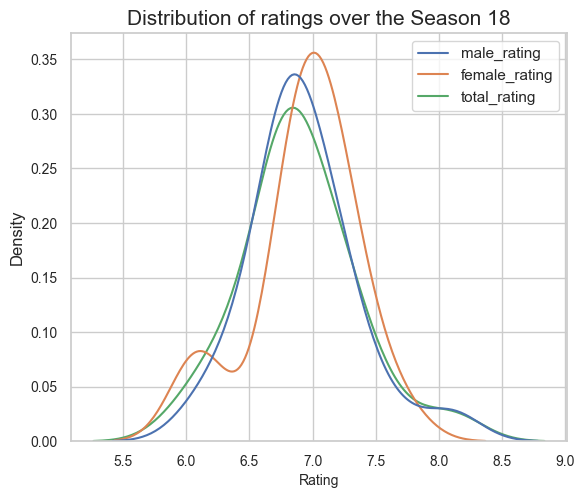

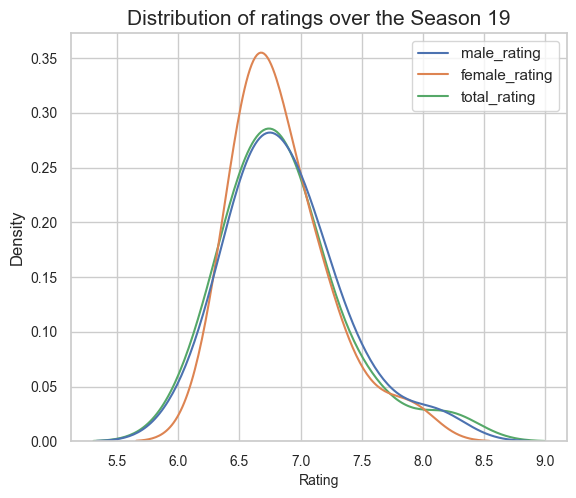

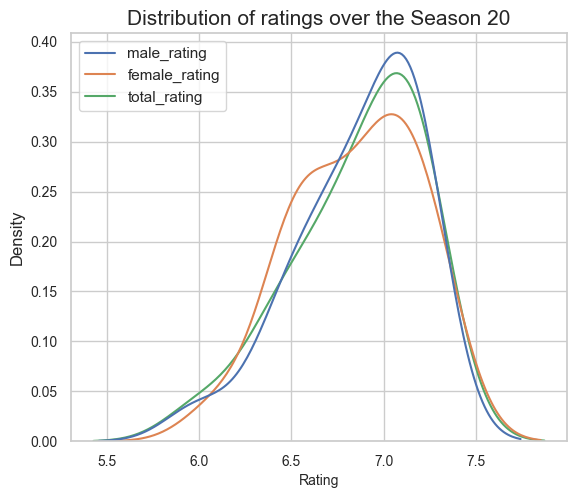

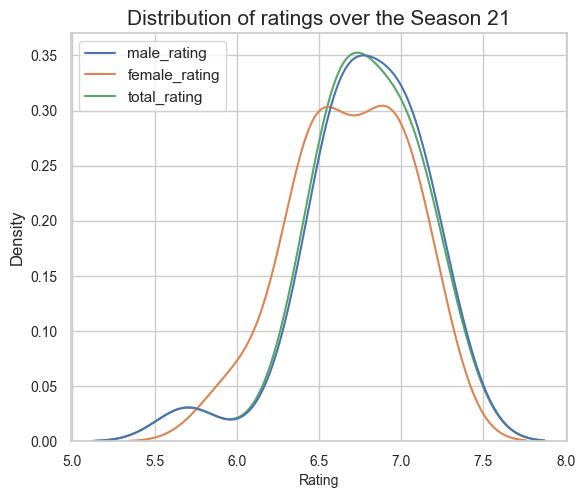

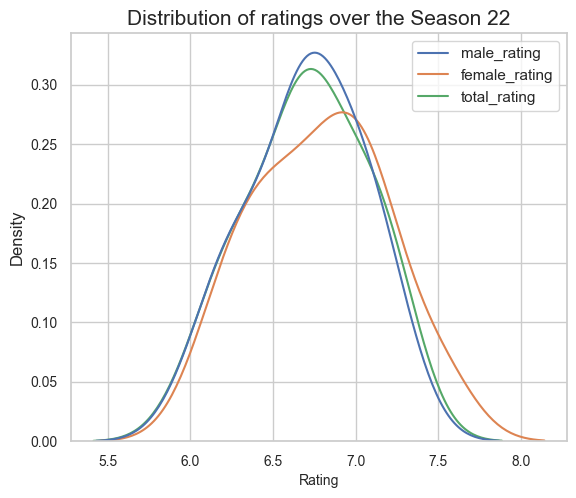

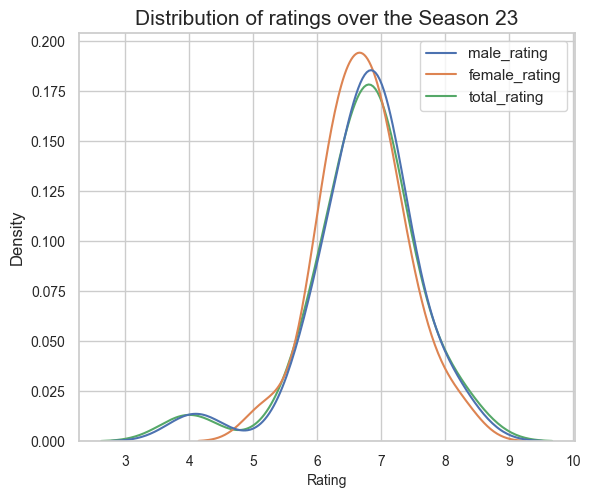

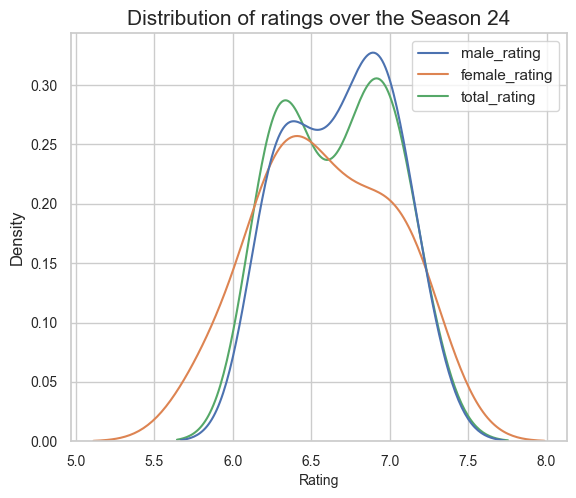

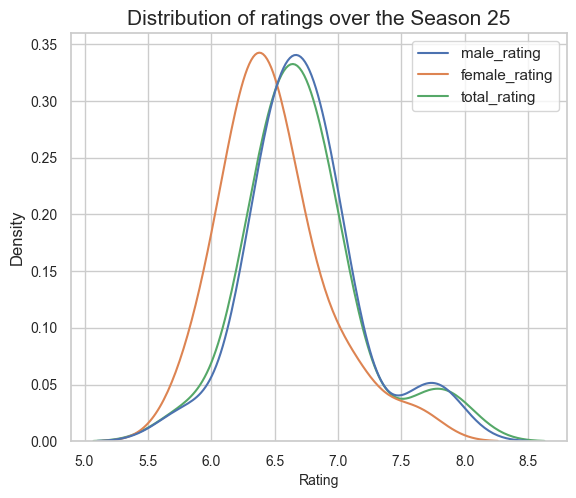

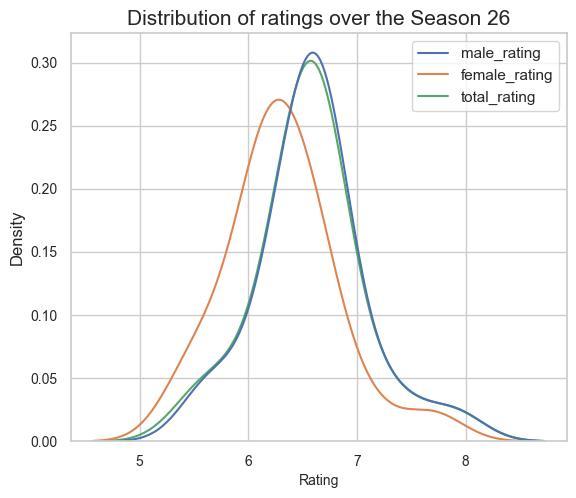

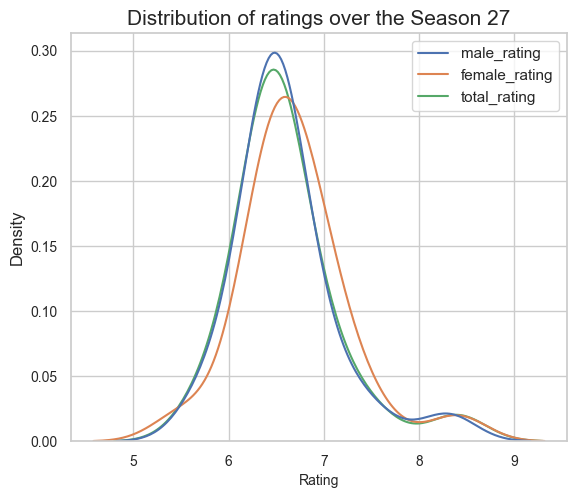

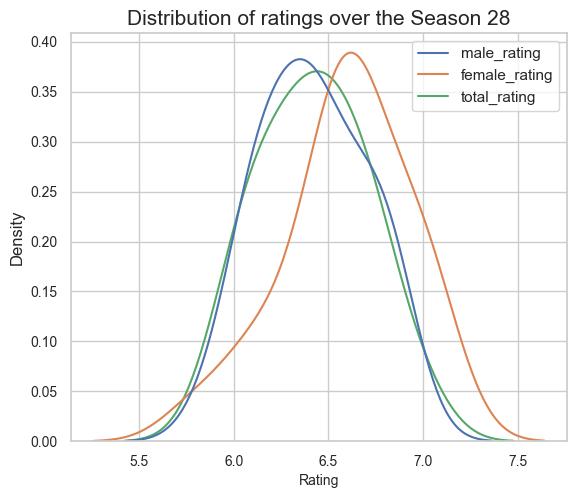

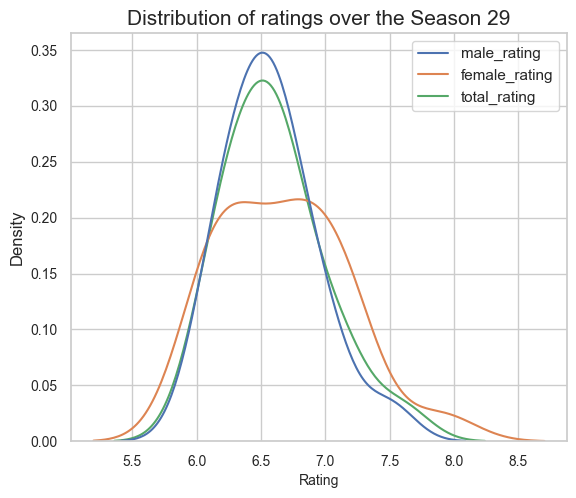

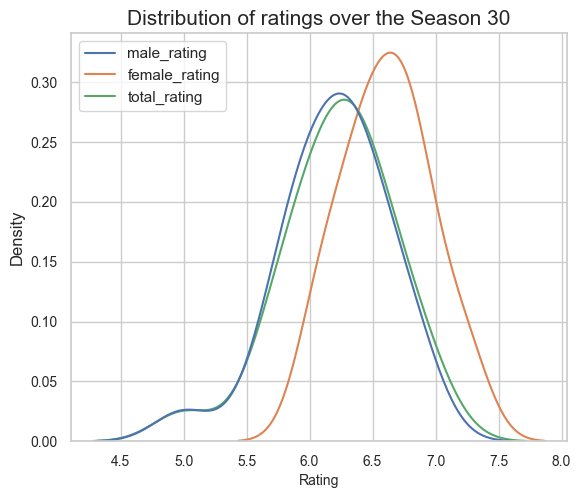

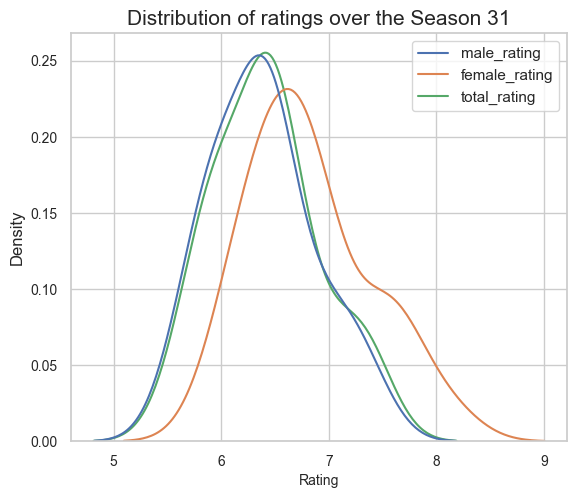

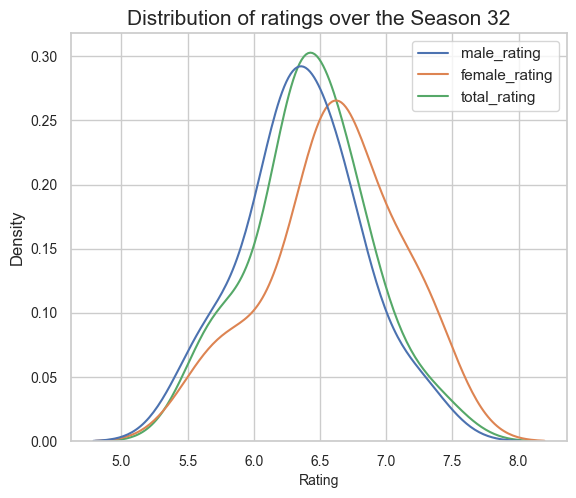

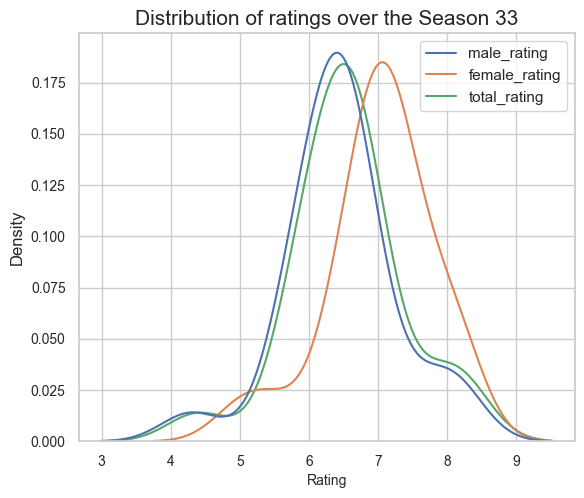

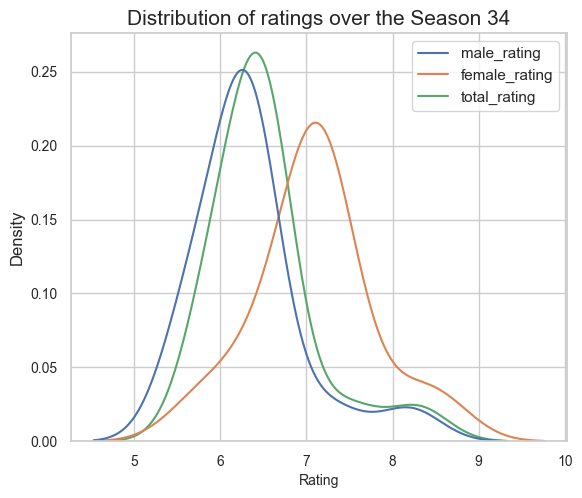

In [377]:
def plot_seasons_ratings():
    seasons = [int(x) for x in demographics['season'].unique().tolist()]
    for idx in seasons:
        plt.title(f"Distribution of ratings over the Season {idx}", fontdict={"fontsize": 15})
        plt.xlabel('Rating', fontdict={"fontsize": 10})
        plt.tick_params(axis="both", which="major", labelsize=10)
        sns.kdeplot(data=[demographics.loc[demographics['season'] == idx, 'male_rating'],
                      demographics.loc[demographics['season'] == idx, 'female_rating'],
                       demographics.loc[demographics['season'] == idx, 'total_rating']])
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
        plt.show()

plot_seasons_ratings()

### 2.2 Which guest speaker is the best one?

In this section we are exploring the distribution over the rating of the guest speakers. Are there any guest speakers that perform significantly better than others and are episodes with guest speakers that are generally funnier than other ones?

In [378]:
df = pd.read_csv('Datasets/scraped/box_data.csv')
df.head()

production_code                       voice  \
0            7G08                         NaN   
1            7G02  Marcia Wallace, Ms. Mellon   
2            7G03              Marcia Wallace   
3            7G04                         NaN   
4            7G05                         NaN   

                                  chalkboard_gag                 couch_gag  \
0                                            NaN                       NaN   
1                       "I will not waste chalk"   Squashed Bart couch gag   
2           "I will not skateboard in the halls"   llapsed Couch couch gag   
3                     "I will not burp in class"  Squashed Homer couch gag   
4  This episode did not feature a chalkboard gag                       NaN   

                                 show_runner                     written_by  \
0  James L. Brooks, Matt Groening, Sam Simon                      Mimi Pond   
1  James L. Brooks, Matt Groening, Sam Simon                      Jon Vitti   
2  James L. Brooks, Matt Groening, Sam Simon  Jay Kogen, Wallace Wolodarsky   
3  James L. Brooks, Matt Groening, Sam Simon            Al Jean, Mike Reiss   
4  James L. Brooks, Matt Groening, Sam Simon              John Swartzwelder   

                     directed_by  
0                David Silverman  
1                David Silverman  
2                     Wes Archer  
3  Gregg Vanzo, Kent Butterworth  
4                David Silverman

In [379]:
df_full = df.copy()
df = df.dropna(subset=['voice'])
df['voice'] = df['voice'].str.split(',')
frame = df[['production_code', 'voice']].explode('voice')

In [380]:
speaker_production_code = []
for guest in frame['voice'].unique():
    speaker_production_code.append(frame[frame['voice'] == guest]['production_code'].tolist())

guest_speaker_dict = {}
for i in range(len(speaker_production_code)):
    guest_speaker_dict[frame['voice'].unique()[i]] = speaker_production_code[i]

In [381]:
df_episodes = pd.read_csv('./Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
df_episodes[['imdb_rating','imdb_votes']] = df_episodes[['imdb_rating','imdb_votes']].fillna(0)
df_episodes[['imdb_rating', 'imdb_votes']] = df_episodes[['imdb_rating', 'imdb_votes']].replace('', 0)


df_guest_speaker_rating = pd.DataFrame(columns=['guest_speaker', 'imdb_rating', 'imd_votes', 'number_of_episodes'])
for i in range(len(speaker_production_code)):
    
    episodes_speaker = guest_speaker_dict[frame['voice'].unique()[i]]
    guest_speaker = frame['voice'].unique()[i]
    num_episodes = len(episodes_speaker)
    episodes_rating = []
    episodes_votes = []

    for episode in episodes_speaker:
        #only take the episodes that we have the data from in the kaggle csv sheet
        if episode not in df_episodes['production_code'].unique():
            continue

        rating = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_rating'].values[0]
        votes = df_episodes.loc[df_episodes['production_code'] == episode, 'imdb_votes'].values[0]
        episodes_rating.append(rating)
        episodes_votes.append(votes)

    df_guest_speaker_rating.loc[i] = [guest_speaker, episodes_rating, episodes_votes, num_episodes]

In [382]:
df_guest_speaker_rating.to_csv('./Datasets/scraped/guest_speaker_rating.csv')
df_guest_speaker_rating.head()

guest_speaker                                        imdb_rating  \
0  Marcia Wallace  [7.8, 7.5, 8.2, 8.3, 8.4, 8.4, 8.2, 8.4, 8.2, ...   
1      Ms. Mellon                                              [7.8]   
2      Ron Taylor                                         [7.6, 8.3]   
3   Albert Brooks                [7.9, 7.5, 6.0, 9.2, 7.2, 7.3, 6.8]   
4    Sam McMurray                                              [7.4]   

                                           imd_votes  number_of_episodes  
0  [1973.0, 1709.0, 1369.0, 1272.0, 1414.0, 1394....                  25  
1                                           [1973.0]                   1  
2                                   [1674.0, 1084.0]                   2  
3  [1638.0, 1578.0, 1051.0, 2439.0, 562.0, 505.0,...                   7  
4                                           [1511.0]                   1

<Axes: xlabel='guest_speaker'>

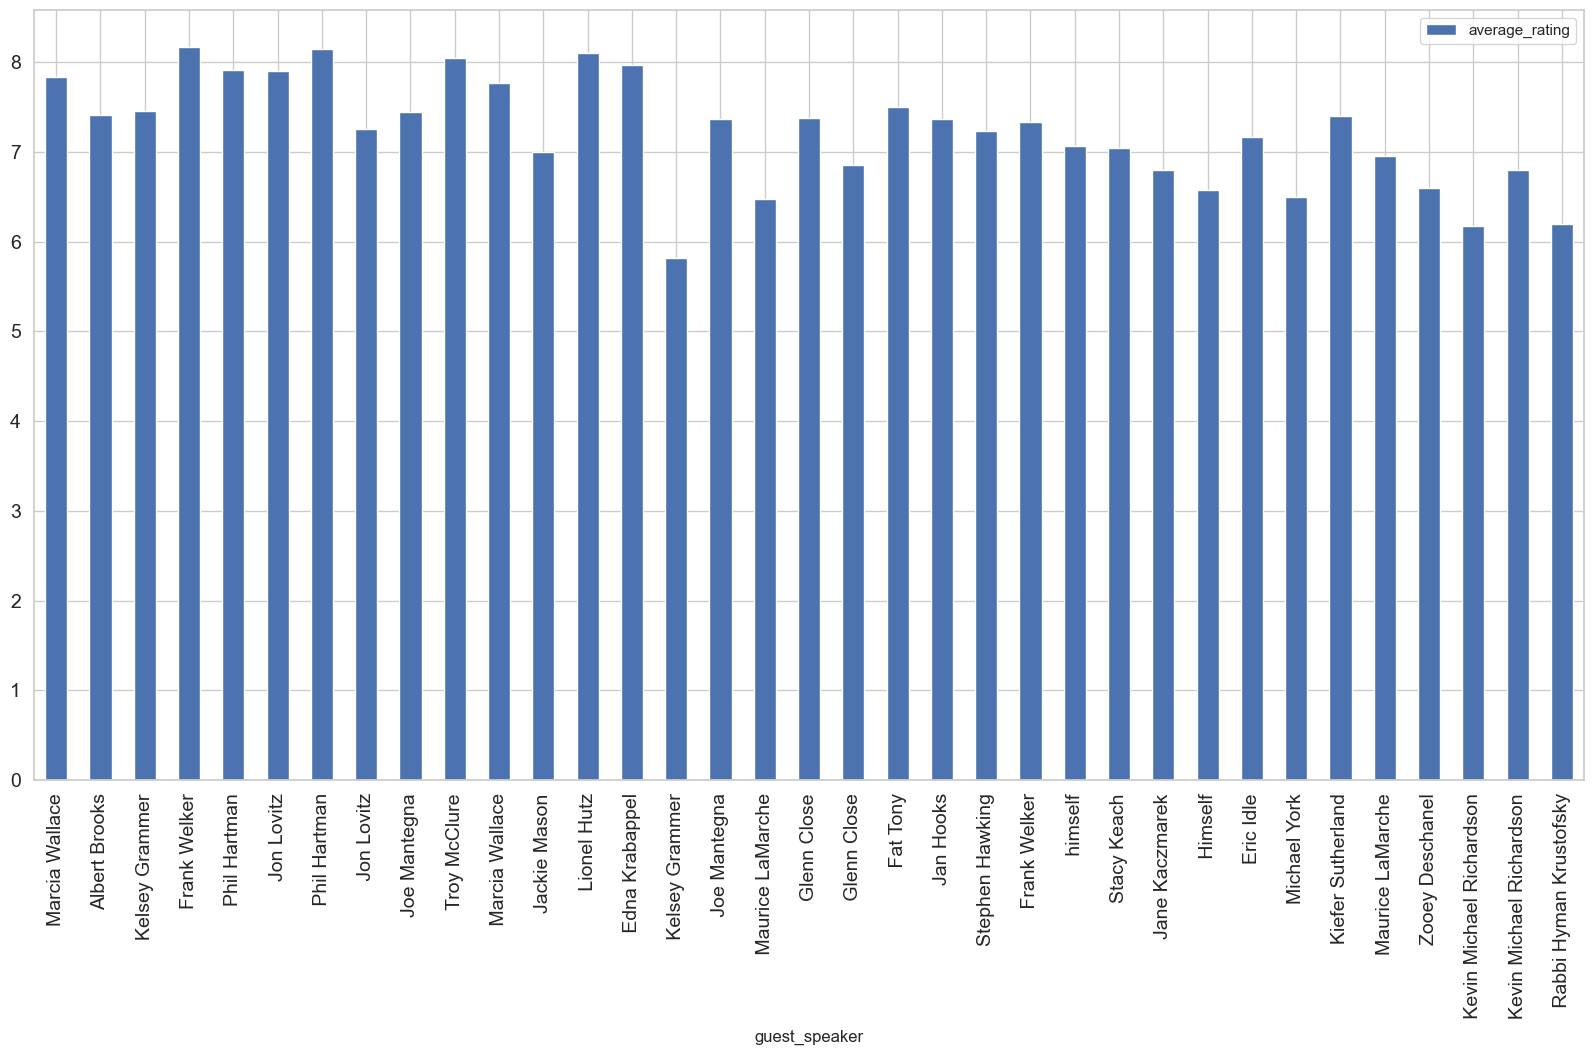

In [383]:
df_guest_speaker_rating.head()
df_guest_speaker_rating = df_guest_speaker_rating[df_guest_speaker_rating['imdb_rating'].map(len) > 0]

df_guest_speaker_rating['average_rating'] = df_guest_speaker_rating['imdb_rating'].apply(lambda x: np.average(x))
df_guest_speaker_rating['average_rating'] = df_guest_speaker_rating['average_rating'].sort_values(ascending=False)

df_guest_speaker_rating[df_guest_speaker_rating['number_of_episodes'] >= 3].plot(x='guest_speaker', y='average_rating', kind='bar', figsize=(20,10), fontsize=14)

It becomes clear that the rating of the guest speakers is uniformly distributed. There doesnt seem to be a guest speaker that stands out from the rest.

#### 2.2.1 Do episodes with guest speakers get better reviews than the ones without?

In [384]:
df_guest_speaker = df_full.dropna(subset=['voice'])
df_no_guest_speaker = df_full[df_full['voice'].isna()]

df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')

print('Average with guest speakers',df_episodes[df_episodes['production_code'].isin(df_guest_speaker['production_code'])]['imdb_rating'].mean())
print('Average without a guest speaker',df_episodes[df_episodes['production_code'].isin(df_no_guest_speaker['production_code'])]['imdb_rating'].mean())

Average with guest speakers 7.393873085339169
Average without a guest speaker 7.385074626865671


It also becomes clear that episodes with guest speakers dont get a better rating than episodes without one. 

### 2.3 Development of speaking time for the simpsons family over the course of seasons
In the following script we are trying to find out how the speaking time of each character changes over the course of the seasons. Since the speaking time is roughly linearly dependant on the word count, we counted the words for each character in each episode and added it up over the seasons. To do that we first have to clean the dataset of outliers, because there are a couple values in there that are very unrealistic. Any cell above a 150 words is considered an outlier.

In [385]:
df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')
df_scripts.head()

df_scripts = df_scripts[df_scripts['word_count'] < 150]

C:\Users\nikol\AppData\Local\Temp\ipykernel_12904\361789780.py:1: DtypeWarning: Columns (4,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scripts = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')


Then we drop columns without a character_id or no record of the word_count

In [386]:
df_scripts = df_scripts.dropna(subset=['character_id','word_count'])
df_scripts['character_id'] = df_scripts['character_id'].astype(int)
df_scripts['word_count'] = df_scripts['word_count'].astype(int)
df_scripts = df_scripts[['character_id', 'word_count','episode_id']]	

In [387]:
episode_id = []
for episode in df_scripts['episode_id'].unique():
    episode_id.append(df_scripts[df_scripts['episode_id'] == episode][['character_id','word_count']].values)

In [388]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()

id              name   normalized_name gender
0   7          Children          children    NaN
1  12  Mechanical Santa  mechanical santa    NaN
2  13        Tattoo Man        tattoo man    NaN
3  16  DOCTOR ZITSOFSKY  doctor zitsofsky    NaN
4  20          Students          students    NaN

In [389]:
episode_dict = {}
for i,episode in enumerate(df_scripts['episode_id'].unique()):
    character_dict = {}
    id_list = episode_id[i].tolist()
    for line in id_list:
        if line[0] not in character_dict:
            character_dict[line[0]] = line[1]
        else:
            character_dict[line[0]] += line[1]
    episode_dict[episode] = character_dict

Now we have a dictionary with the episode_id as a key and a dictionary as a value. The dictionary has the character_id as a key and the word count of the character in that episode as a value. Now we need to group this by the season to get a wordcount for each character per season.

In [390]:
df_characters = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
df_characters.head()
def map_character_id_to_name(id):
    return df_characters.loc[df_characters['id'] == id, 'normalized_name'].values[0]

for characters in episode_dict.keys():
    episode_dict[characters] = {map_character_id_to_name(key): value for key, value in episode_dict[characters].items()}

In [391]:
season_dict = {}
df_episodes = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')

for season in df_episodes['season'].unique():
    season_dict[season] = df_episodes.loc[df_episodes['season'] == season, 'id'].values.tolist()

season_character_dict = {}
for season in season_dict.keys():
    season_character_dict[season] = {}
    for episode in season_dict[season]:

        if episode not in episode_dict.keys():
            continue
        for character in episode_dict[episode].keys():
            if character not in season_character_dict[season]:
                season_character_dict[season][character] = episode_dict[episode][character]
            else:
                season_character_dict[season][character] += episode_dict[episode][character]


In [392]:
df_season_character = pd.DataFrame(columns=['season', 'character', 'word_count'])

for season in season_character_dict.keys():
    for character in season_character_dict[season].keys():
        df_season_character.loc[len(df_season_character.index)] = [season, character, season_character_dict[season][character]]
df_season_character.head()

season      character  word_count
0       1    eugene fisk           4
1       1        mr fisk          92
2       1  marge simpson        3662
3       1  homer simpson        8146
4       1   bart simpson        4868

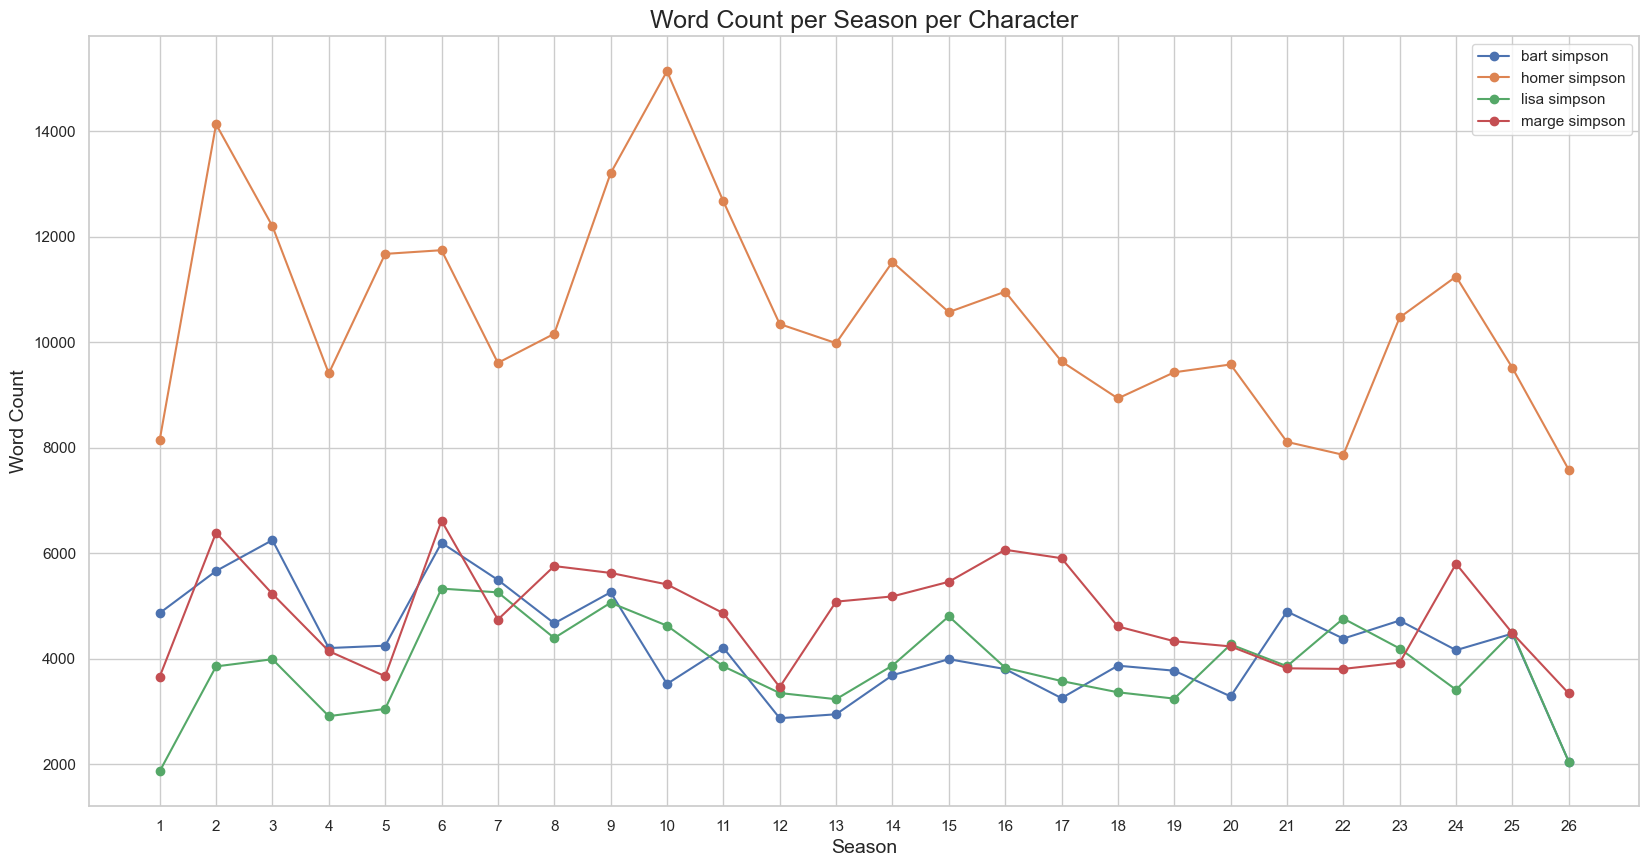

In [393]:
import matplotlib.pyplot as plt
df_season_character_copy = df_season_character.copy()
df_season_character = df_season_character_copy.copy()
''' group by characters and sum the word count per season in descending order and only include a list of characters per season '''
df_season_character = df_season_character.loc[df_season_character['character'].isin(['bart simpson', 'homer simpson', 'lisa simpson', 'maggie simpson', 'marge simpson'])]
df_season_character = df_season_character.groupby(['season','character']).sum().sort_values(by=['season','word_count'], ascending=False).groupby('season').head(5).reset_index()
characters = ['bart simpson', 'homer simpson', 'lisa simpson', 'marge simpson']

fig, ax = plt.subplots(figsize=(20,10))
for character in characters:
    df = df_season_character[df_season_character['character'] == character]
    ax.plot(df['season'], df['word_count'], label=character, marker='o')
    ax.set_xticks(df['season'])
ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Word Count', fontsize=14)
ax.set_title('Word Count per Season per Character', fontsize=18)
ax.legend()
plt.show()


It is obvious that the word count does underly some changes but the ranking roughly stays the same. Homer always says the most and Marge, Bart and Lisa have roughly the same speaking time.

### 2.4 What features influence the rating of an episode?

To answer this question we counted number of reported features in each episode from its References page on the simpsons wiki fandom.

In [394]:
references_raw_df = pd.read_csv('./Datasets/scraped/references.csv')

In [395]:
references_raw_df.describe()

Trivia  Cultural references  Continuity       Goofs  \
count  617.000000           617.000000  617.000000  617.000000   
mean     8.594814             2.847650    0.275527    4.849271   
std      7.023927             5.424463    1.428581    4.234786   
min      0.000000             0.000000    0.000000    0.000000   
25%      4.000000             0.000000    0.000000    2.000000   
50%      7.000000             0.000000    0.000000    4.000000   
75%     12.000000             5.000000    0.000000    7.000000   
max     67.000000            43.000000   16.000000   37.000000   

       Cultural References  Appearances in other media  Trivia/Goofs  \
count           617.000000                  617.000000    617.000000   
mean              3.758509                    0.001621      0.520259   
std               5.401872                    0.040258      3.137021   
min               0.000000                    0.000000      0.000000   
25%               0.000000                    0.000000      0.000000   
50%               0.000000                    0.000000      0.000000   
75%               6.000000                    0.000000      0.000000   
max              40.000000                    1.000000     36.000000   

       Goofs/Trivia  Previous Episode References  Production Notes  ...  \
count    617.000000                   617.000000        617.000000  ...   
mean       0.050243                     0.405186          0.149109  ...   
std        0.638894                     2.075954          0.365479  ...   
min        0.000000                     0.000000          0.000000  ...   
25%        0.000000                     0.000000          0.000000  ...   
50%        0.000000                     0.000000          0.000000  ...   
75%        0.000000                     0.000000          0.000000  ...   
max       10.000000                    20.000000          2.000000  ...   

       International premieres        Cuts  \
count               617.000000  617.000000   
mean                  0.003241    0.001621   
std                   0.080517    0.040258   
min                   0.000000    0.000000   
25%                   0.000000    0.000000   
50%                   0.000000    0.000000   
75%                   0.000000    0.000000   
max                   2.000000    1.000000   

       References to Toy Story in Condiments      Goofs'  Continuity Errors  \
count                             617.000000  617.000000         617.000000   
mean                                0.011345    0.001621           0.003241   
std                                 0.281809    0.040258           0.080517   
min                                 0.000000    0.000000           0.000000   
25%                                 0.000000    0.000000           0.000000   
50%                                 0.000000    0.000000           0.000000   
75%                                 0.000000    0.000000           0.000000   
max                                 7.000000    1.000000           2.000000   

       In-show references  Culture References  \
count          617.000000          617.000000   
mean             0.001621            0.024311   
std              0.040258            0.603877   
min              0.000000            0.000000   
25%              0.000000            0.000000   
50%              0.000000            0.000000   
75%              0.000000            0.000000   
max              1.000000           15.000000   

       Characters seen in the Advent Calendar  Continually  \
count                              617.000000   617.000000   
mean                                 0.040519     0.003241   
std                                  1.006462     0.080517   
min                                  0.000000     0.000000   
25%                                  0.000000     0.000000   
50%                                  0.000000     0.000000   
75%                                  0.000000     0.000000   
max                       

From the raw data it can be seen that naming conventions is not something that wiki fandom editors follow i.e., slightly different names are used to indicate the same things.

In [396]:
references_raw_df.sum().loc[references_raw_df.sum() > 28]

Trivia                             5303
Cultural references                1757
Continuity                          170
Goofs                              2992
Cultural References                2319
Trivia/Goofs                        321
Goofs/Trivia                         31
Previous Episode References         250
Production Notes                     92
Trivia/Cultural References           86
Censorship                           49
Call-Backs to previous episodes      31
dtype: int64

In addition, not all features are reoccurring, and from the summary above we observe small number of the most frequently reported ones. (But again naming conventions problem)

#### 2.4.1 Counting features

It was decided to pick the following feature counts as they are the most frequently reported:
- Cultural references
- Goofs: almost unnoticeable visual mistakes or slight visual inconsistencies between consecutive sences
- Self-references: references to previous/future episodes

In addition, Error counts (factual errors in the script) was used in the analysis out interest.

The feature counts data was cleaned accordingly and their trends per episodes/seasons are analysed together with rating.

In [397]:
features_df = pd.read_csv('./Datasets/scraped/ref_counts_clean.csv')
episodes_df = pd.read_csv('./Datasets/data-society-the-simpsons-by-the-data/simpsons_episodes.csv')
voting_df = pd.read_csv('./Datasets/scraped/voting_demographics.csv')

voting_df['season'] = voting_df['season'].astype(int)
voting_df['episode'] = voting_df['episode'].astype(int)
voting_df = voting_df.sort_values(by=['season', 'episode'])
voting_df.index += 1
features_df.index +=1
analysis_df = pd.concat([features_df.head(600), voting_df.head(600)], axis=1)
analysis_df['season'] = analysis_df['season'].astype(int)
analysis_df['episode'] = analysis_df['episode'].astype(int)

In [398]:
def smooth(scalars, weight):
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val

    return smoothed

def normalize(data, column):
    return (data[column]-data[column].mean())/data[column].std()

In [399]:
import matplotlib.pyplot as plt

rating_cols = ['total_rating', '<18_rating', '18-29_rating', '30-44_rating', '45+_rating']
ref_cols = ['cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count']

def ratings_refs_graph(data, col, refs, xlabel, title):
    y1 = smooth(list(normalize(data, refs)), 0.9)
    y2 = smooth(list(normalize(data, col)), 0.9)
    plt.plot(y1, label=refs.replace('_', ' ').capitalize())
    plt.plot(y2, label=col.replace('_', ' ').capitalize())
    plt.legend()
    plt.ylabel('Normalized scale')
    plt.xlabel(xlabel)
    plt.title(title.replace('_', ' ').capitalize())
    plt.show()

In [400]:
ref_cols_mean = ['mean_' + x for x in ref_cols]
ref_cols_sum = ['sum_' + x for x in ref_cols]
rating_cols_mean = ['mean_' + x for x in rating_cols]

season_granular_mean = analysis_df.groupby(by='season').mean().add_prefix('mean_')
season_granular_sum = analysis_df.groupby(by='season').sum().add_prefix('sum_')
season_granular_analysis = pd.concat([season_granular_mean, season_granular_sum], axis=1)

Since the goal is to get idea of whether trends in features have any relation to trends in ratings, the moving average is used to smooth out the data. In addition, the data is normalized to enable us plotting it together on the same scale.

First, let's observe the plots of the mean/sum of features counts with granularity of seasons.

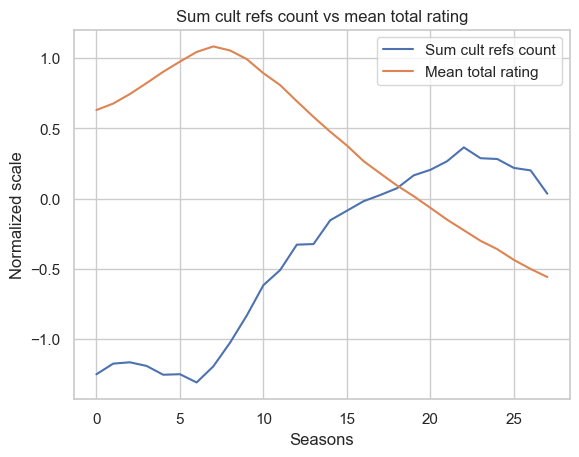

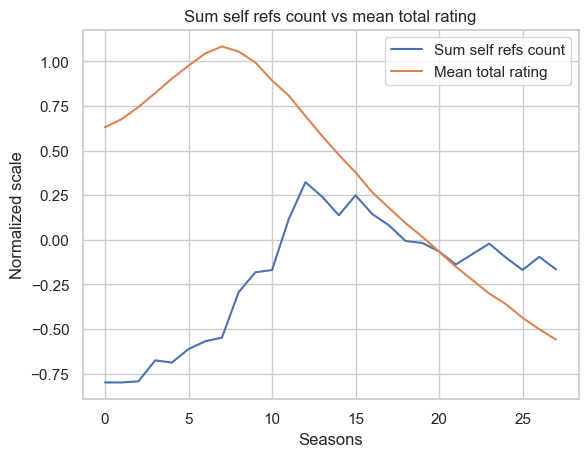

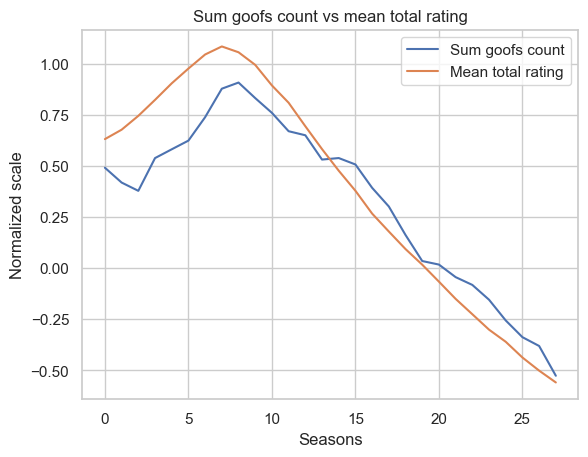

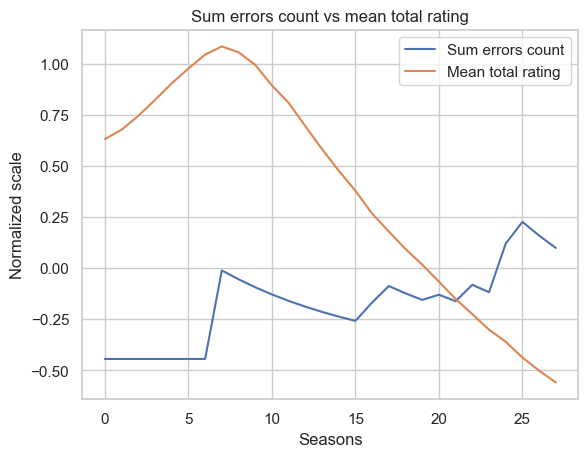

In [401]:
for col in ref_cols_sum:
    ratings_refs_graph(season_granular_analysis, 'mean_total_rating', col, 'Seasons', col + ' vs mean_total_rating')

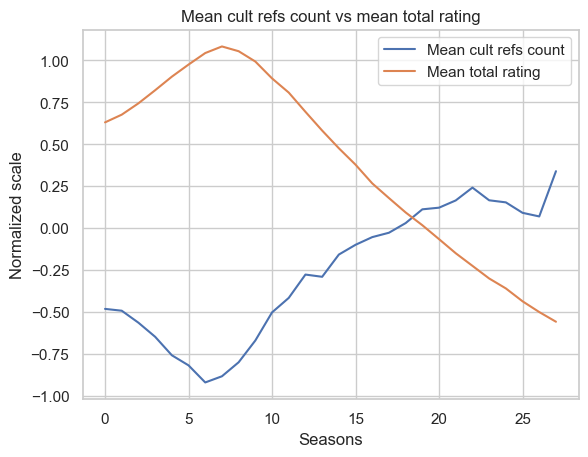

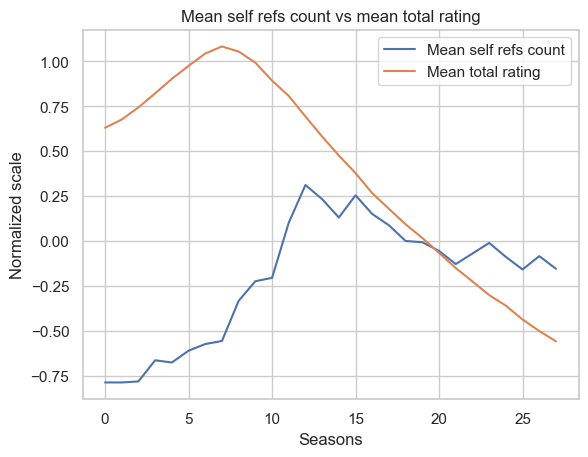

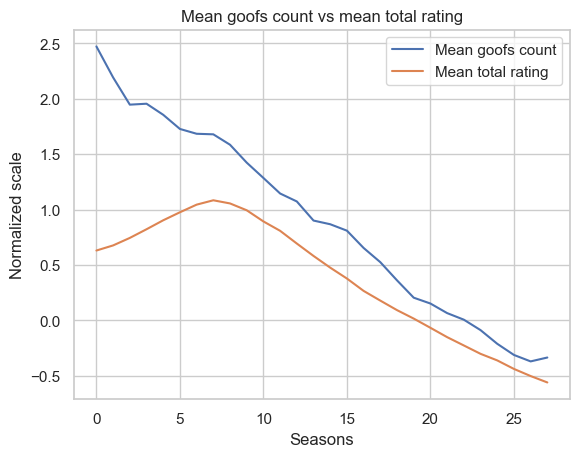

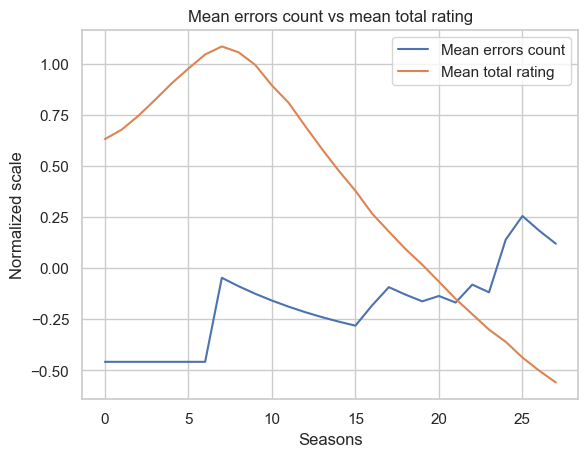

In [402]:
for col in ref_cols_mean:
    ratings_refs_graph(season_granular_analysis, 'mean_total_rating', col, 'Seasons', col + ' vs mean_total_rating')

It becomes clear that trends in number of self-references and errors have no relation to the ratings. On the other hand, graphs of sums of cultural references and goofs surprisingly appear to be highly correlated with the rating (former negatively and latter positively).

Let's observe those features more in detail now with granularity of episodes and for different age groups.

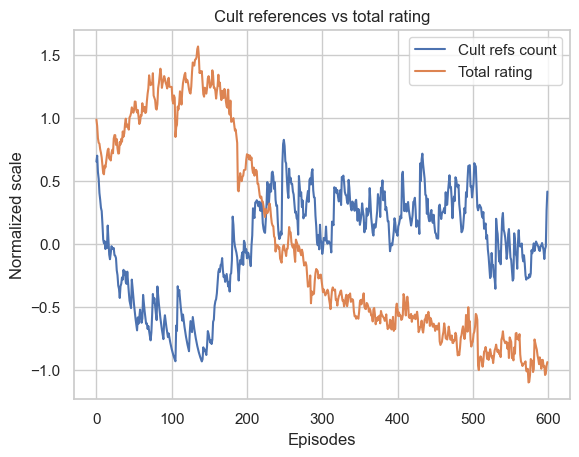

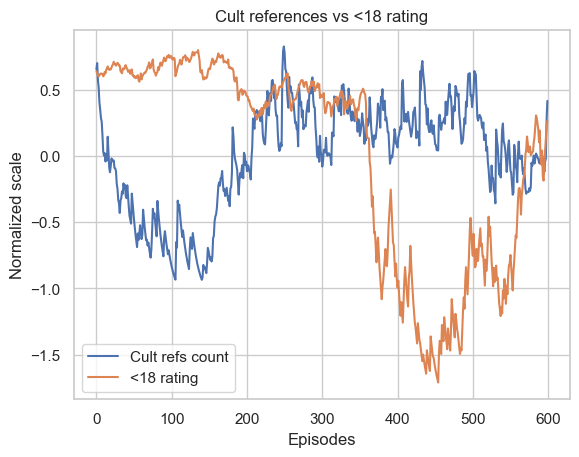

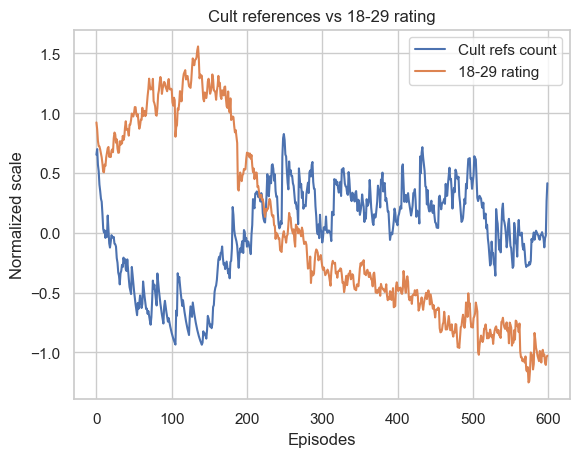

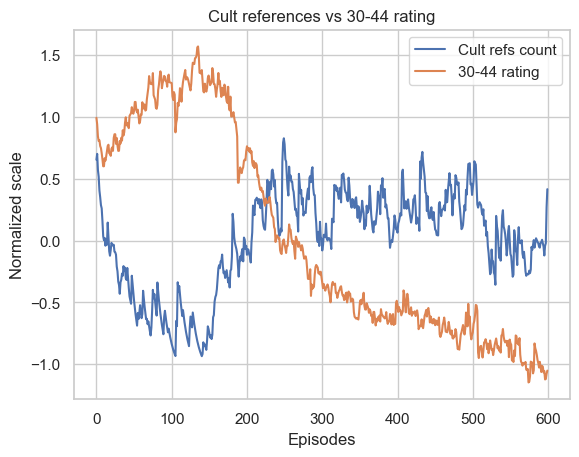

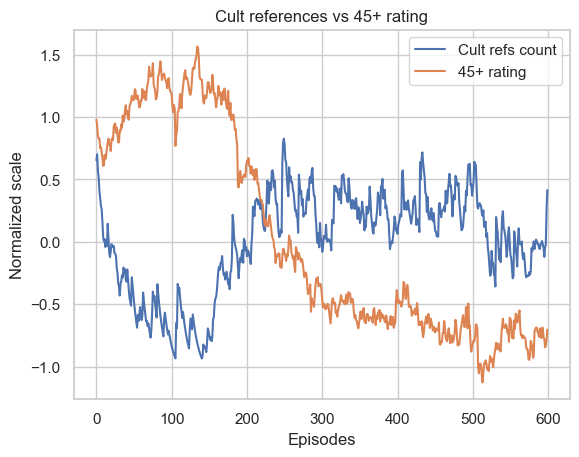

In [403]:
for col in rating_cols:
    ratings_refs_graph(analysis_df, col, 'cult_refs_count', 'Episodes', 'Cult references vs ' + col)

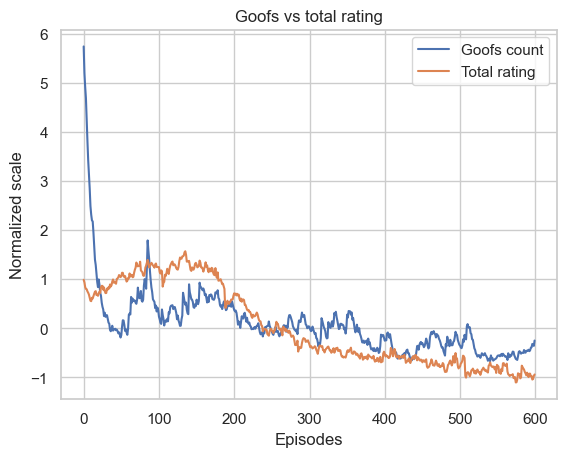

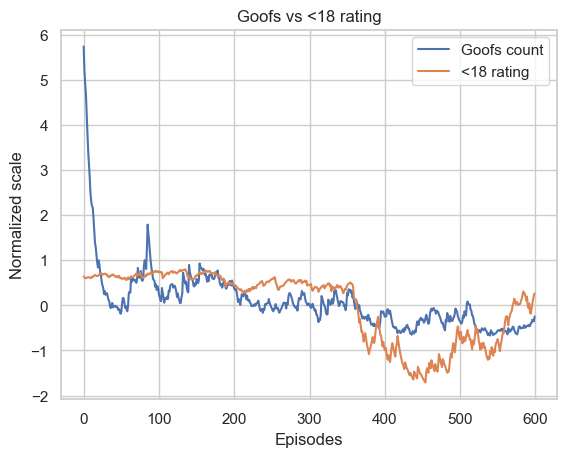

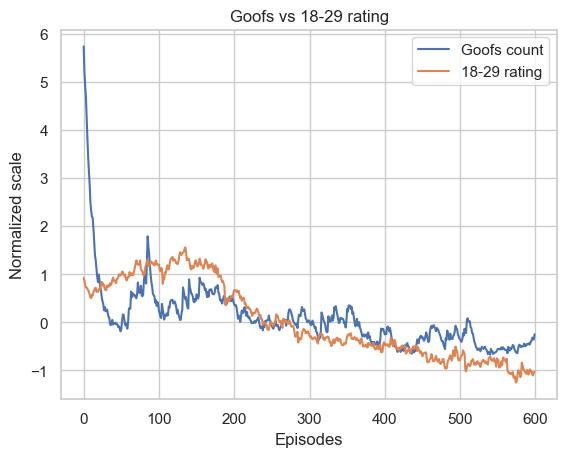

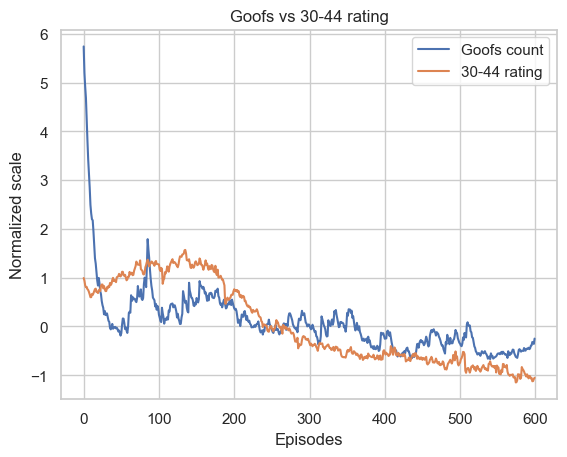

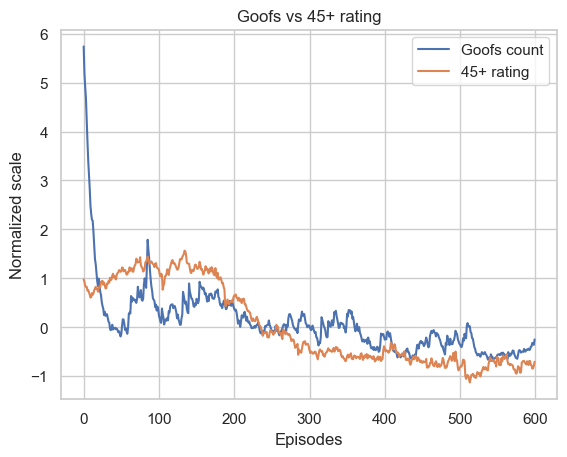

In [404]:
for col in rating_cols:
    ratings_refs_graph(analysis_df, col, 'goofs_count', 'Episodes', 'Goofs vs ' + col)

Graphs above give us a new insight with regard to ratings by underage group of voters, as their ratings trend appears to be much more different from older groups and seems to be less related to the trends in numbers of reported goofs and cultural references.

A superficial statement that can be made for sure is that scriptwriters of earlier seasons relied much less on cultural references and thus, were more original with the jokes and plots in episodes. Surprisingly, number of goofs per seasons also picks with the mean episode rating and falls with each new season. This can be possibly explained by the fact that production of animation became more controlled/supervised. If this also happened to the writers team, then it could be the reason of decreased quality of writing.

#### 2.4.2 Catchphrase trends

To extend our analysis a bit more, we utilize scripts to extract a catchphrase from memorable characters and compare their count trends with ratings.
For this task, TF-IDF summary is used.
Scripts are also preprocessed with a list of stopwords. This list was complied from an extensive list of english stopwords, names of characters in the show and several unique words appeared often but did not mean anything significant (e.g., sweetie, maggies, lis).

Sources used in this section:
- stopwords: https://www.ranks.nl/stopwords
- plotting function: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

In [405]:
stopwords_df = pd.read_csv('Datasets/scraped/stopwords.csv')
script_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')
characters_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_characters.csv')
script_df['character_id'] = script_df['character_id'].fillna(0).astype(int)

C:\Users\nikol\AppData\Local\Temp\ipykernel_12904\1098175798.py:2: DtypeWarning: Columns (4,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  script_df = pd.read_csv('Datasets/data-society-the-simpsons-by-the-data/simpsons_script_lines.csv')


In [406]:
names_list = characters_df['normalized_name'].tolist()
sep_names_list = []
for name in names_list:
    if ' ' in name:
        sep_names_list += name.split(' ')
    else:
        sep_names_list.append(name)
stopwords_df = pd.concat([stopwords_df, pd.DataFrame({'stopwords':sep_names_list})], ignore_index=True)

In [407]:
character_lines = []
for i in range(6000):
    spaced_lines = script_df.loc[script_df['character_id']==(i+1)]['normalized_text']+' '
    sep_lines = spaced_lines.tolist()
    sep_lines = [x for x in sep_lines if str(x) != 'nan']
    total_lines = ''.join(sep_lines)
    character_lines.append(total_lines)

In [408]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=stopwords_df['stopwords'].tolist(),
                             lowercase=True, max_df=0.005, norm='l2', smooth_idf=True)
tf_idf_matrix = vectorizer.fit_transform(character_lines)
feature_names = vectorizer.get_feature_names_out()

D:\Documents\Programming\datamadness\venv\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['11', '13', '16', '20', '24', '32', '3po', '40', '52s', '60', '80', '800', 'abdul', 'alikes', 'altered', 'amer', 'anti', 'apocalyptic', 'armed', 'ass', 'auto', 'autograph', 'bare', 'beaver', 'bitten', 'bohemian', 'bot', 'bottle', 'bound', 'brew', 'busted', 'cart', 'chapin', 'check', 'chested', 'chilled', 'clam', 'clams', 'clean', 'clone', 'conrad', 'crest', 'day', 'deranged', 'dia', 'ding', 'dong', 'drive', 'dubbed', 'electronically', 'elegantly', 'er', 'ers', 'espn', 'esque', 'euro', 'european', 'eyed', 'fast', 'faucet', 'fedex', 'fielder', 'foot', 'ghibli', 'glue', 'goer', 'golly', 'good', 'goony', 'grade', 'green', 'grumpy', 'guilden', 'hag', 'haired', 'hairy', 'handed', 'hard', 'hating', 'headed', 'holo', 'hop', 'ish', 'jabbar', 'jail', 'jam', 'jocks', 'jub', 'kicked'

In [409]:
def top_k_words(id):
    feature_scores = tf_idf_matrix[id].toarray().tolist()[0]
    feature_dict = dict(zip(feature_names, feature_scores))
    top_k_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:10]

    top_k_keywords = [feature[0] for feature in top_k_features]
    char_name = characters_df.loc[characters_df['id']==id+1]['name'].tolist()[0]
    return top_k_keywords, char_name

top_k_words(7)

(['carumba',
  'ay',
  'awesome',
  'lame',
  'sucks',
  'nyah',
  'homework',
  'aye',
  'prank',
  'crappy'],
 'Bart Simpson')

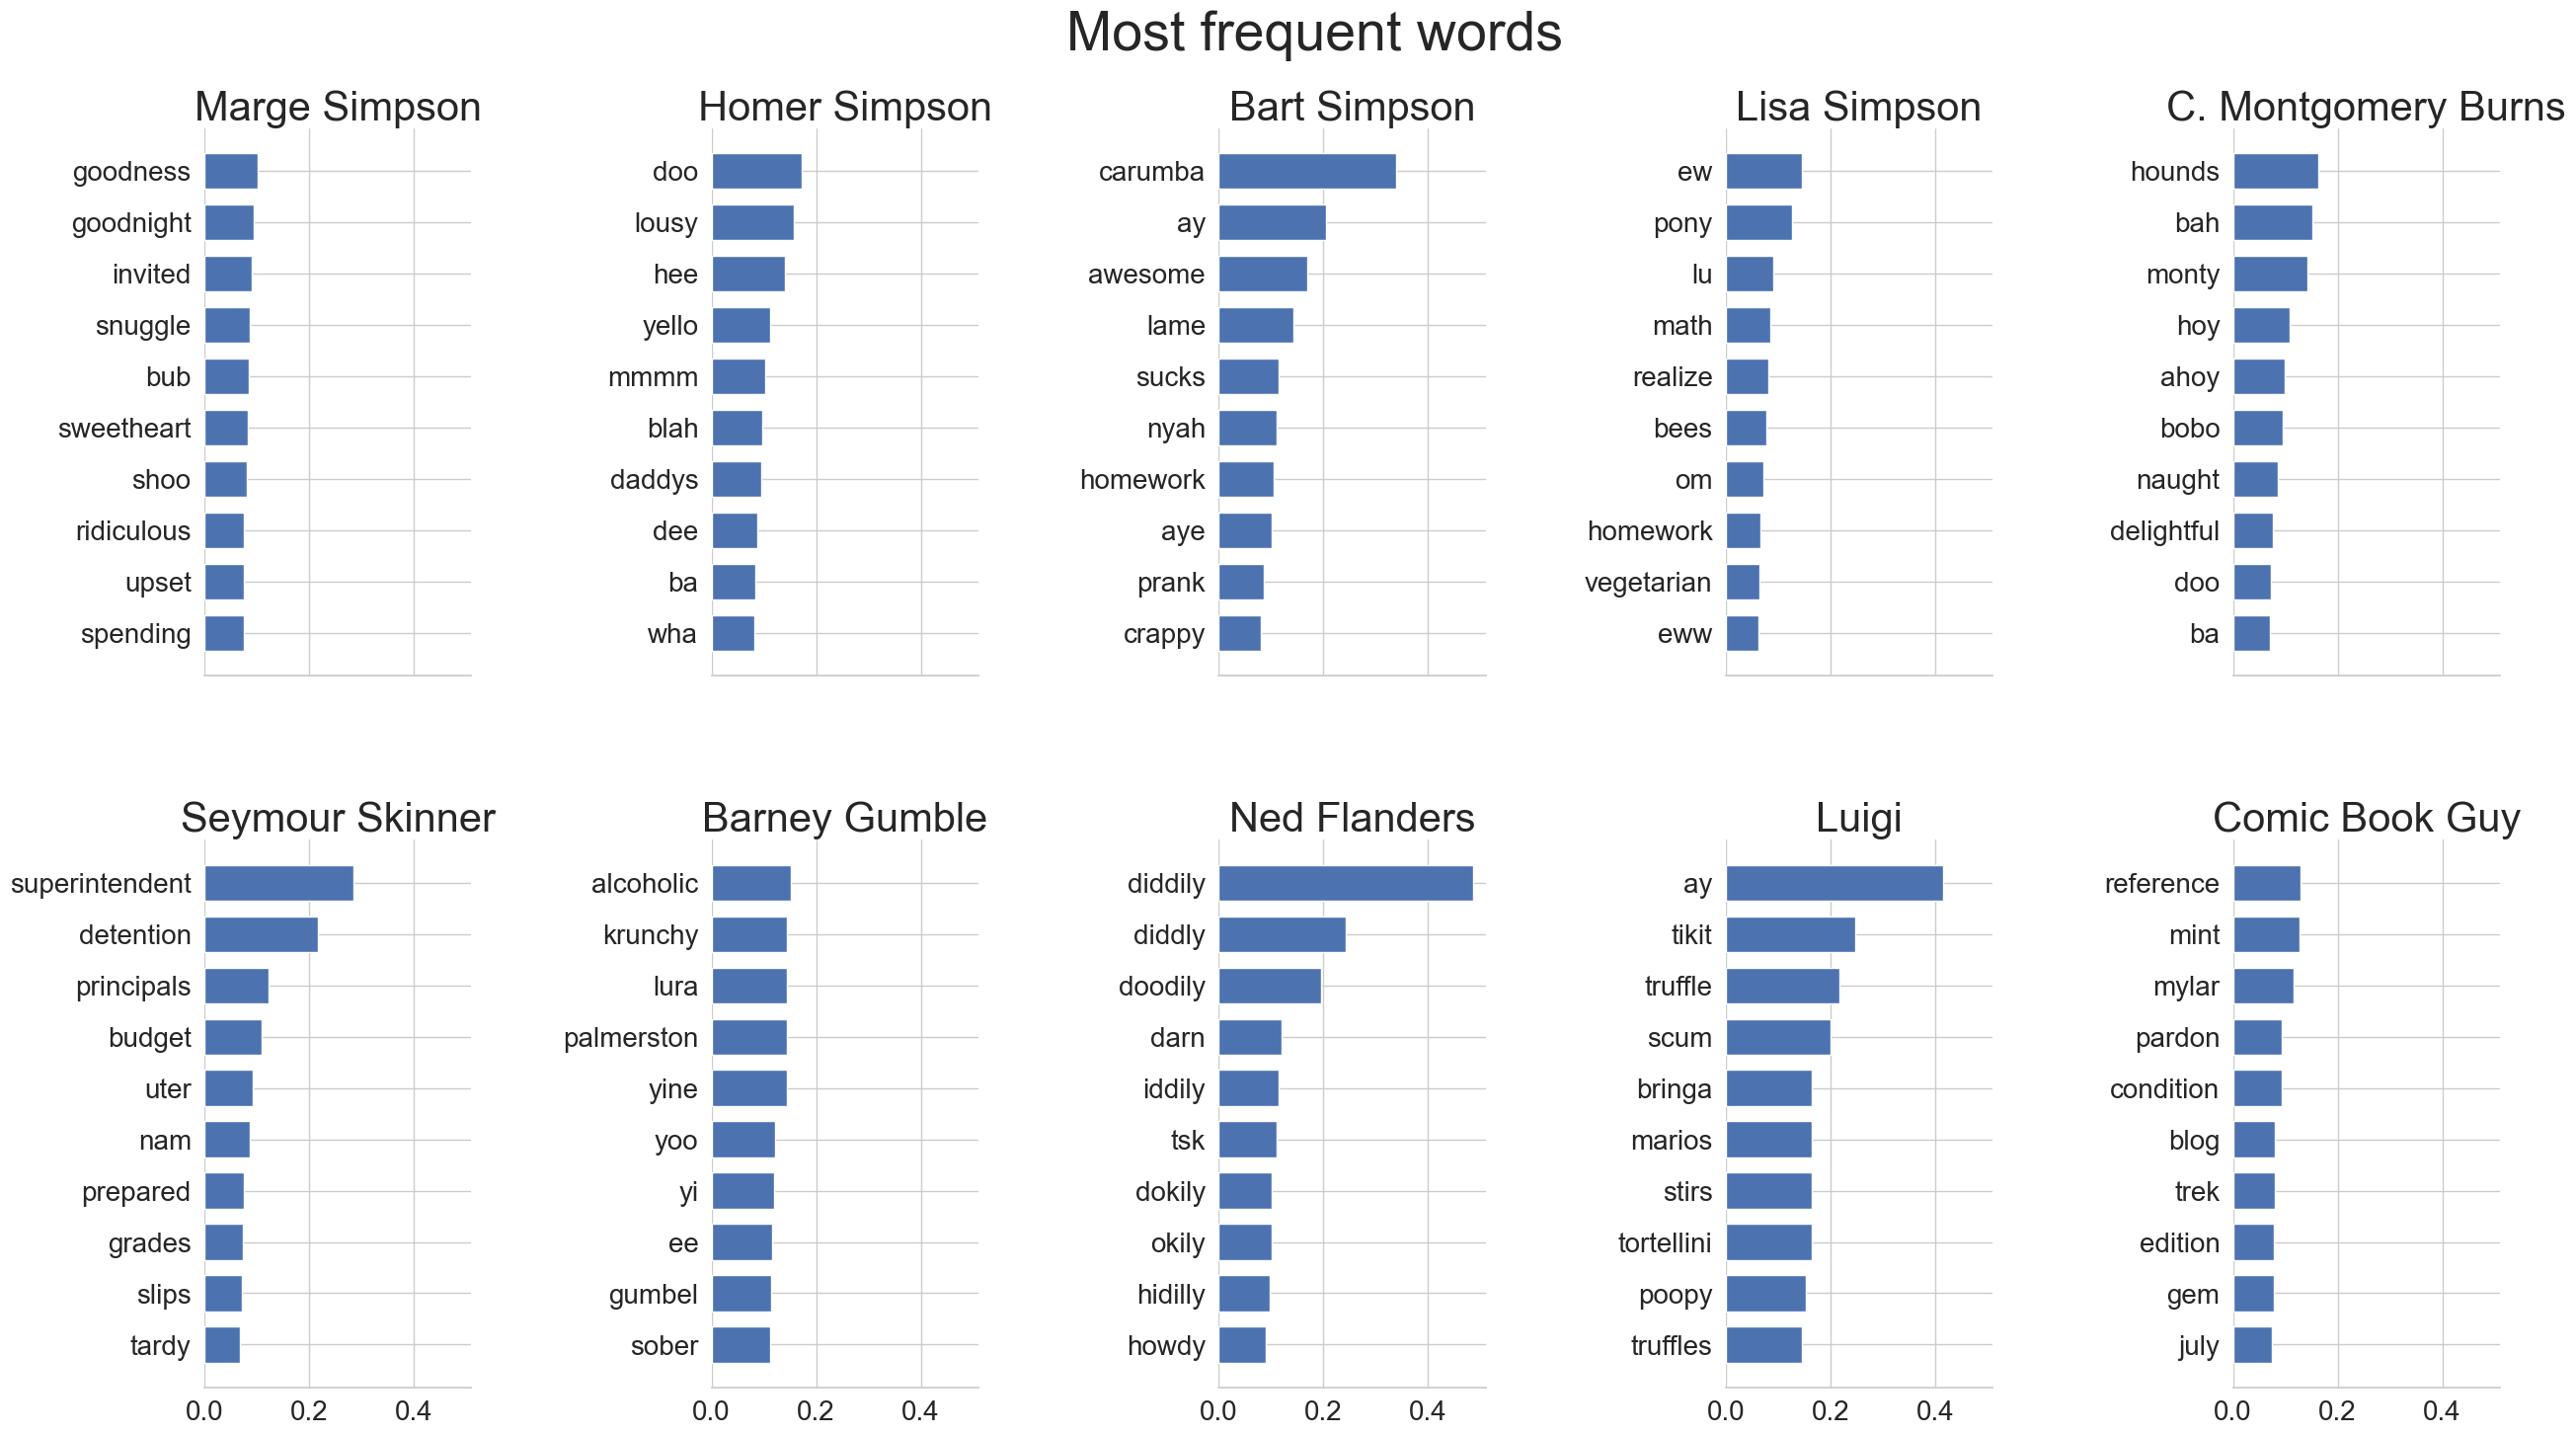

In [410]:
selected_characters = [0, 1, 7, 8, 14, 2, 17, 10, 1434, 800]
catchprases = []
def plot_top_words():
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for idx, char_id in enumerate(selected_characters):
        feature_scores = tf_idf_matrix[char_id].toarray().tolist()[0]
        feature_dict = dict(zip(feature_names, feature_scores))
        top_k_features = sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)[:10]
        top_k_keywords = [feature[0] for feature in top_k_features]

        catchprases.append(top_k_keywords[0])

        weights = [feature[1] for feature in top_k_features]

        character_name = characters_df.loc[characters_df['id']==char_id+1]['name'].iloc[0]

        ax = axes[idx]
        ax.barh(top_k_keywords, weights, height=0.7)
        ax.set_title(f"{character_name}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Most frequent words', fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
plot_top_words()

For the plot above, 10 memorable characters from whom hearing catchphrases was most expected are plotted. The graph seems to accurately summarize "common" dictionary of the character (e.g. Bart or Ned).

Now we can plot catchphrase count of characters over the episodes. Together with rating.

In [411]:
script_sorted = script_df.sort_values(by='episode_id')
temp_df = episodes_df[['number_in_series', 'season']].sort_values(by='number_in_series')
temp_df = temp_df.rename(columns={'number_in_series':'episode_id'})
script_sorted = pd.merge(script_sorted, temp_df, on='episode_id')

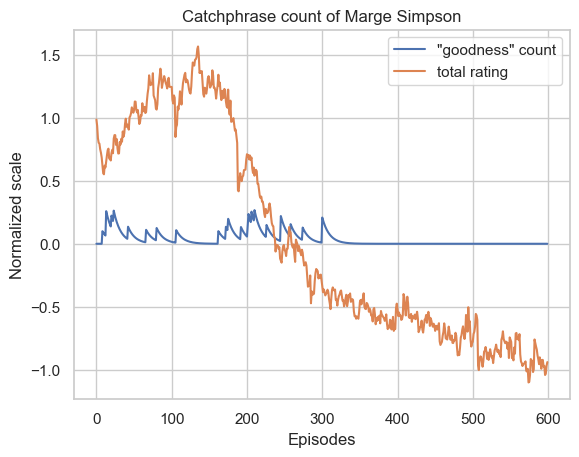

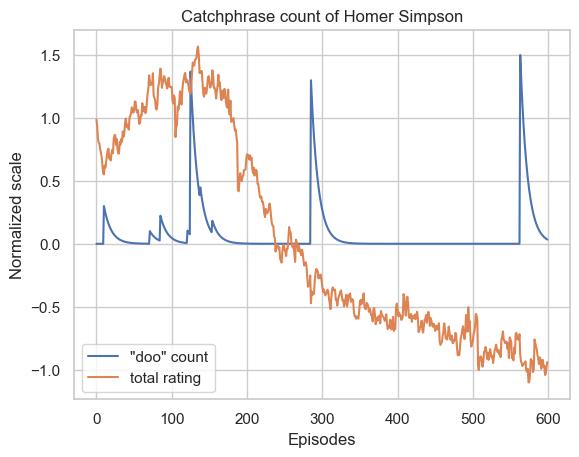

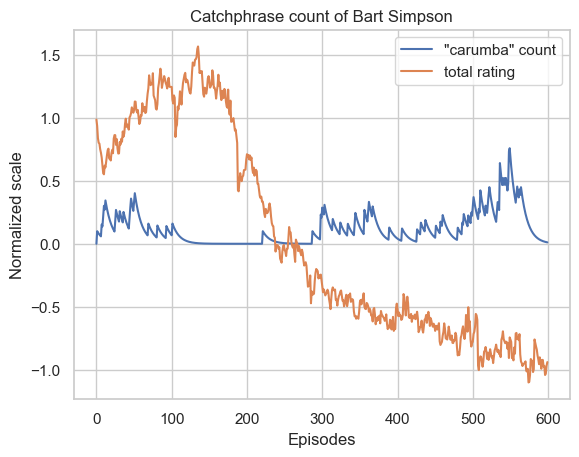

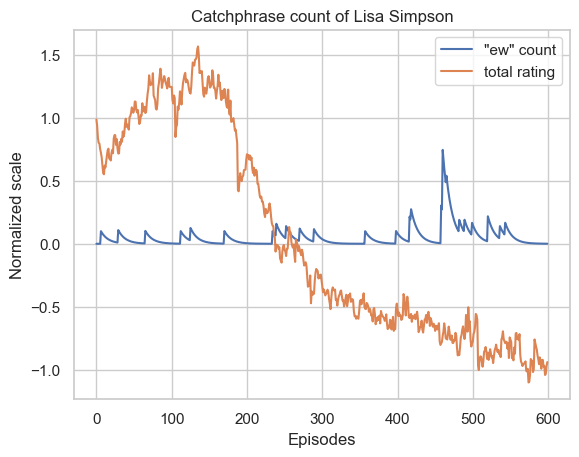

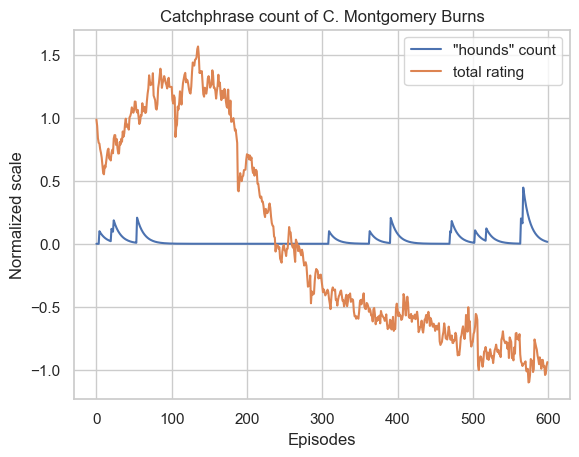

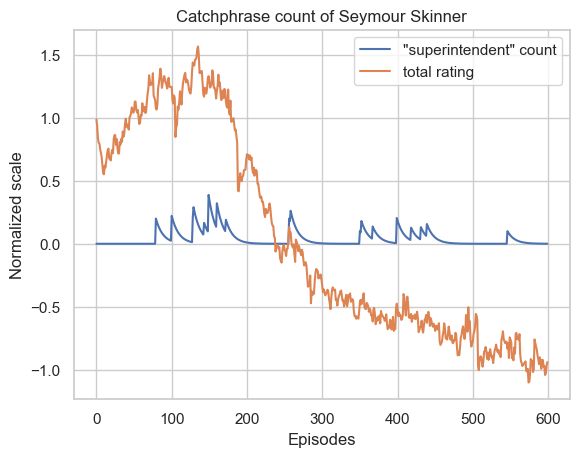

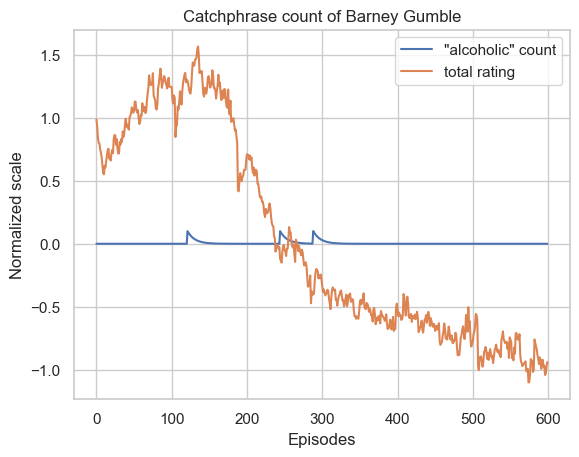

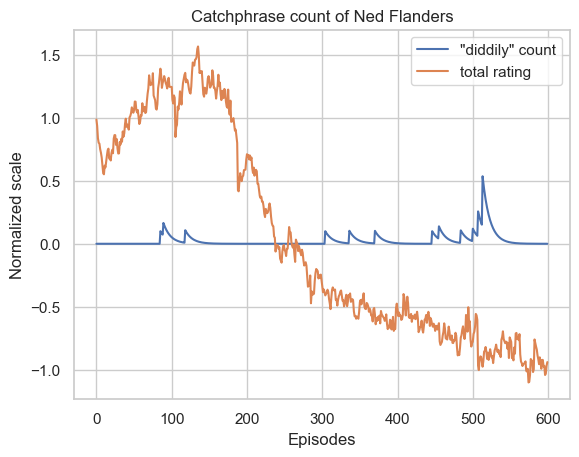

In [412]:
def catch_phrase_per_episode(explored_char):
    phrase_count = []
    for i in range(600):
        char_episode_lines = script_df.loc[(script_df['episode_id']==i) & (script_df['character_id']==selected_characters[explored_char]+1)]['normalized_text']+' '
        char_episode_lines = char_episode_lines.tolist()
        char_episode_lines = [x for x in char_episode_lines if str(x) != 'nan']
        char_episode_words = ''.join(char_episode_lines)
        phrase_count.append(char_episode_words.split().count(catchprases[explored_char]))
    name = characters_df.loc[(characters_df['id']==selected_characters[explored_char]+1)]['name'].iloc[0]
    plt.figure(dpi=100)
    plt.title(f'Catchphrase count of {name}')
    plt.ylabel('Normalized scale')
    plt.xlabel('Episodes')

    y1 = smooth(phrase_count, 0.9)
    y2 = smooth(list(normalize(analysis_df, 'total_rating')), 0.9)
    plt.plot(y1, label=f'"{catchprases[explored_char]}" count')
    plt.plot(y2, label='total rating')
    plt.legend()
    plt.show()
    return (name + ': ' + catchprases[explored_char]), phrase_count

character_phrase_counter = {}
for char_id in range(len(selected_characters)-2):
    char_name, char_phrase_count = catch_phrase_per_episode(char_id)
    character_phrase_counter[char_name] = char_phrase_count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28')])

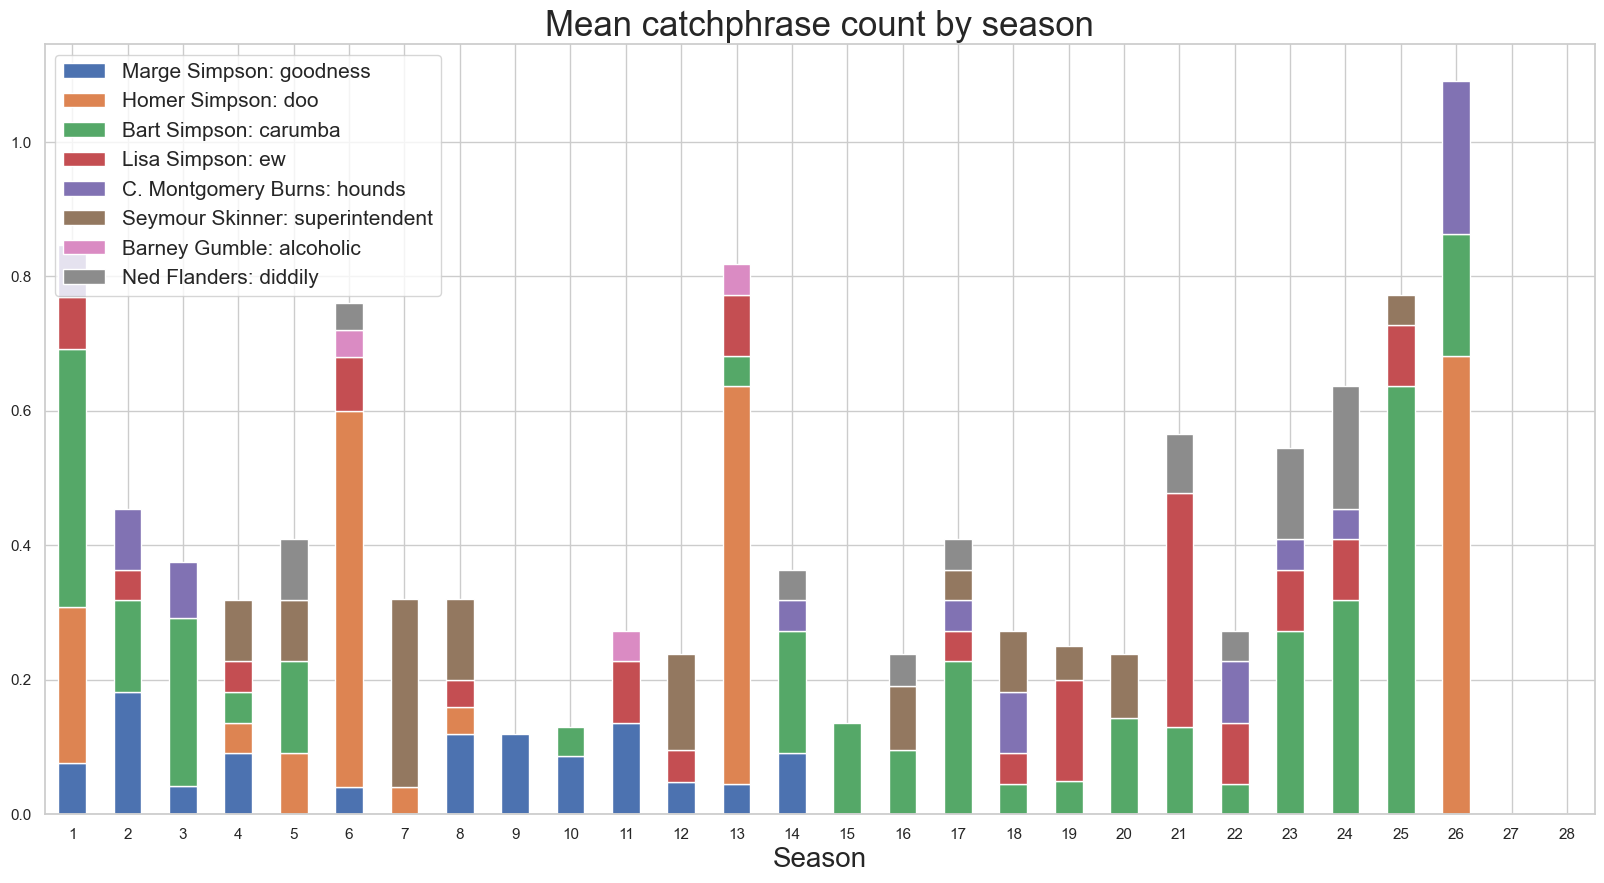

In [413]:
phrase_counter_df = pd.DataFrame(character_phrase_counter)
phrase_counter_df['episode_id'] = [x + 1 for x in range(600)]
phrase_counter_df = pd.merge(phrase_counter_df, analysis_df[['episode_id', 'season']],
                                    on='episode_id')
phrase_counter_df = phrase_counter_df.set_index('episode_id')
phrase_counter_seasons_df = phrase_counter_df.groupby('season').mean()

phrase_counter_seasons_df.plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Mean catchphrase count by season', fontsize=25)
plt.xlabel('Season', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(rotation=0)

Most of the catchphrase counts don't seem to have any rating related trends except for the "carumba" count by Bart, so let's plot it individually and consider as a meaningfull feature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28')])

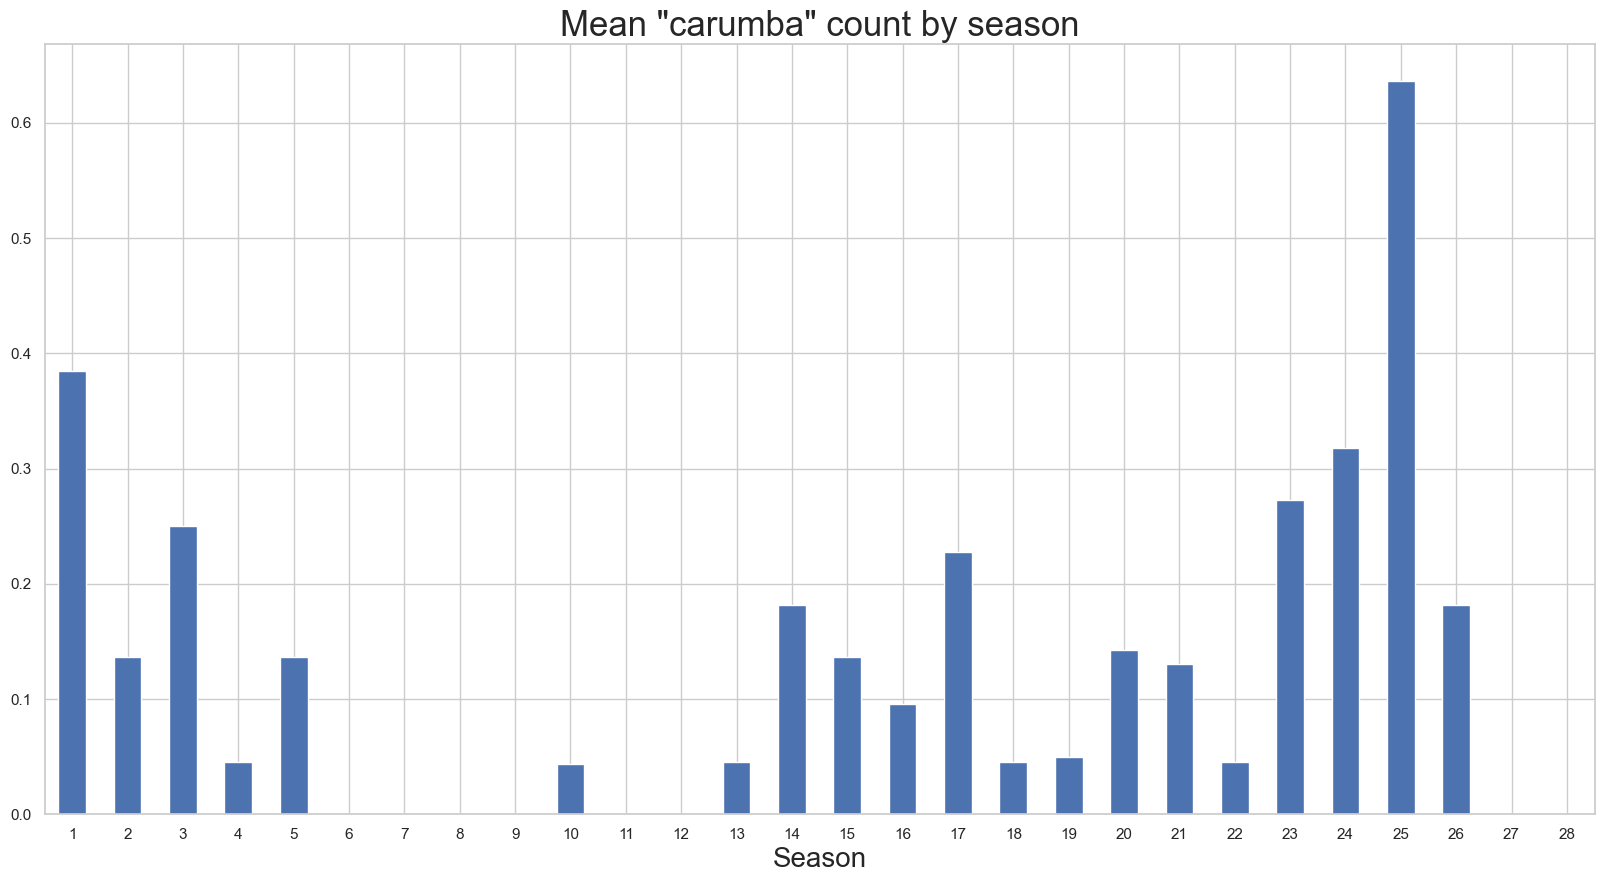

In [414]:
phrase_counter_seasons_df['Bart Simpson: carumba'].plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Mean "carumba" count by season', fontsize=25)
plt.xlabel('Season', fontsize=20)
plt.xticks(rotation=0)

Finally, given a strange nature of commonly used words by Ned Flanders, it would be a great shortcoming not to plot their distribution over the seasons.

In [415]:
flanders_id = 10
flanders_words, _ = top_k_words(10)
flanders_words_counts = dict()
for word in flanders_words:
    words_count = []
    for i in range(600):
        char_episode_lines = script_df.loc[(script_df['episode_id']==i) & (script_df['character_id']==flanders_id+1)]['normalized_text']+' '
        char_episode_lines = char_episode_lines.tolist()
        char_episode_lines = [x for x in char_episode_lines if str(x) != 'nan']
        char_episode_words = ''.join(char_episode_lines)
        words_count.append(char_episode_words.split().count(word))
    flanders_words_counts[word] = words_count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28')])

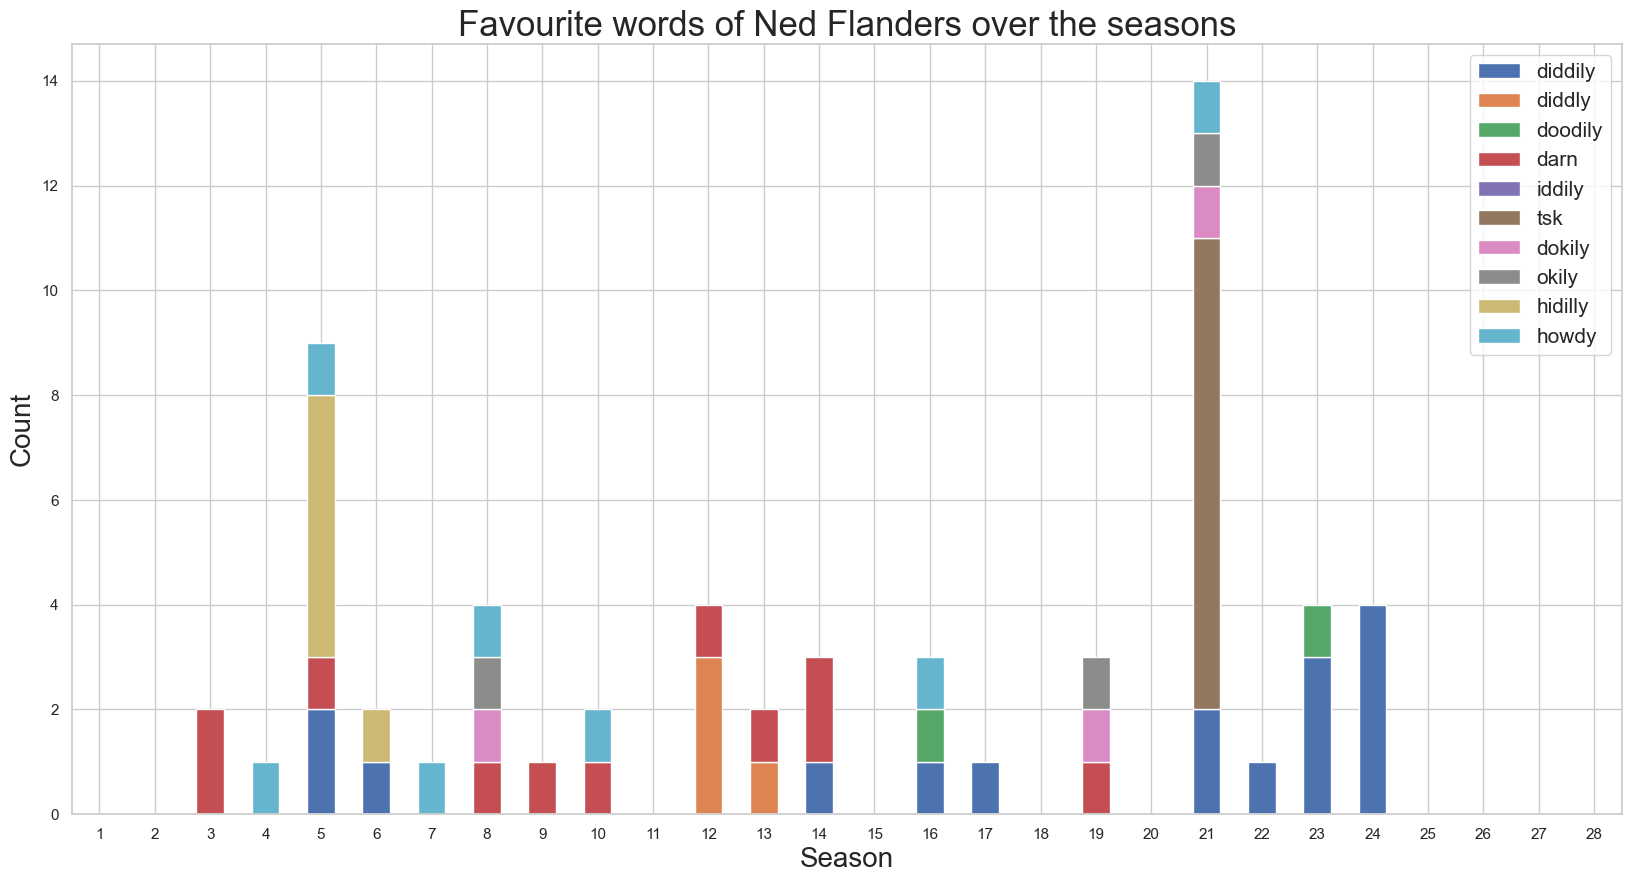

In [416]:
flanders_words_counts_df = pd.DataFrame(flanders_words_counts)
flanders_words_counts_df['episode_id'] = [x+1 for x in range(600)]
flanders_words_counts_df = pd.merge(flanders_words_counts_df, analysis_df[['total_rating', 'episode_id', 'season']], on='episode_id')
flanders_words_counts_df = flanders_words_counts_df.set_index('episode_id')
flanders_words_seasons = flanders_words_counts_df.groupby('season').sum()
flanders_words_seasons[['diddily', 'diddly', 'doodily', 'darn', 'iddily', 'tsk', 'dokily',
       'okily', 'hidilly', 'howdy']].plot(kind='bar', stacked=True, figsize=(20, 10))
plt.title('Favourite words of Ned Flanders over the seasons', fontsize=25)
plt.xlabel('Season', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(fontsize=15)
plt.xticks(rotation=0)

## Part 3: Exploring relation of variables to rating and each other

As the last chapter of this analysis, let's observe deeper insights of the relation of the following key variables and see which ones would be useful if we had decided to predict rating of an episode:
- total episode rating
- number of cultural references
- number of self-references
- goof counts
- error counts
- "carumba" counts: as was seen before, usage of this catchphrase becomes more repetitive in latter seasons, which could also be an indication of self-repetitiveness and poor scriptwriting.

In addition, a season number is included, to simply observe the relation with other variables. Obviously, it would not be used for predictions.

### 3.1 Correlation and Covariance between selected features

In [417]:
words_count = []
for i in range(600):
    char_episode_lines = script_df.loc[(script_df['episode_id']==i) & (script_df['character_id']==8)]['normalized_text']+' '
    char_episode_lines = char_episode_lines.tolist()
    char_episode_lines = [x for x in char_episode_lines if str(x) != 'nan']
    char_episode_words = ''.join(char_episode_lines)
    words_count.append(char_episode_words.split().count('carumba'))
analysis_df['carumba_count'] = words_count

                 total_rating  carumba_count  cult_refs_count  \
total_rating         1.000000      -0.100202        -0.149982   
carumba_count       -0.100202       1.000000        -0.015083   
cult_refs_count     -0.149982      -0.015083         1.000000   
self_refs_count     -0.044515      -0.053638         0.047030   
goofs_count          0.347612      -0.067415        -0.078413   
errors_count        -0.030445      -0.008457        -0.038719   
season              -0.743896       0.104840         0.224865   

                 self_refs_count  goofs_count  errors_count    season  
total_rating           -0.044515     0.347612     -0.030445 -0.743896  
carumba_count          -0.053638    -0.067415     -0.008457  0.104840  
cult_refs_count         0.047030    -0.078413     -0.038719  0.224865  
self_refs_count         1.000000     0.064071      0.073121 -0.009526  
goofs_count             0.064071     1.000000     -0.028428 -0.332996  
errors_count            0.073121    -0.028428  

Text(0.5, 1.0, 'Correlation heatmap of selected variables')

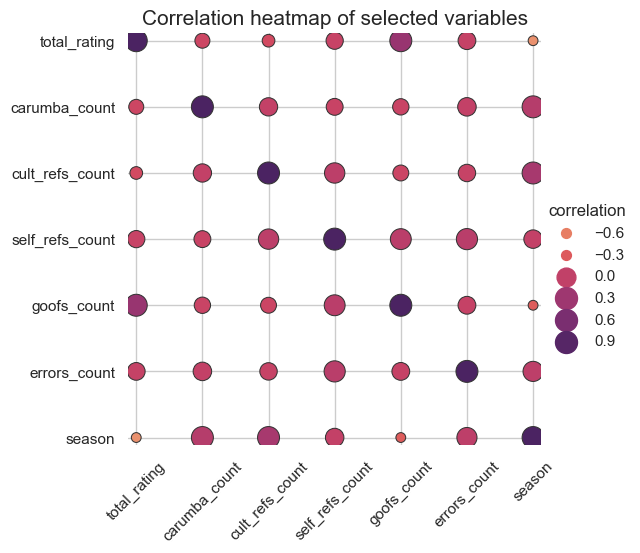

In [418]:
corr_mat_square = analysis_df[['total_rating', 'carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']].corr()
print(corr_mat_square)
corr_mat = corr_mat_square.stack().reset_index(name='correlation')

g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette='flare', hue_norm=(-1, 1), edgecolor=".2",
    height=6, sizes=(50, 250), size_norm=(-.2, .1),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(45)
plt.title('Correlation heatmap of selected variables', fontsize=15)

Text(0.5, 1.0, 'Covariance heatmap of selected variables')

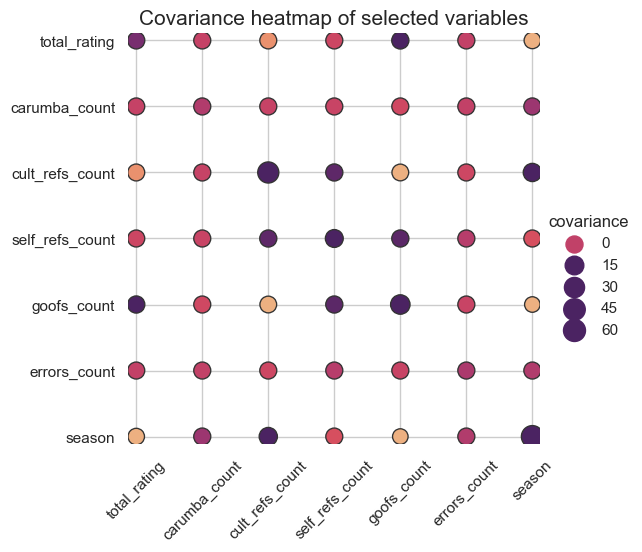

In [419]:
covv_mat = analysis_df[['total_rating', 'carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']].cov()
covv_mat = covv_mat.stack().reset_index(name='covariance')

g = sns.relplot(
    data=covv_mat,
    x="level_0", y="level_1", hue="covariance", size="covariance",
    palette='flare', hue_norm=(-1, 1), edgecolor=".2",
    height=6, sizes=(50, 250), size_norm=(-50, 50),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(45)
plt.title('Covariance heatmap of selected variables', fontsize=15)

From the generated plots, we confirm several of our previous empirical observations, specifically the number of goofs positively correlated with the episode rating. Both "carumba" and cultural references counts have negative correlation with ratings, although not as strong as expected. And other features, except for the season number, have almost no correlation as expected.

### 3.2 Spectral analysis of selected features

A similar conclusion about the influence of goofs count is also observed from the first eigenvector of correlation matrix.

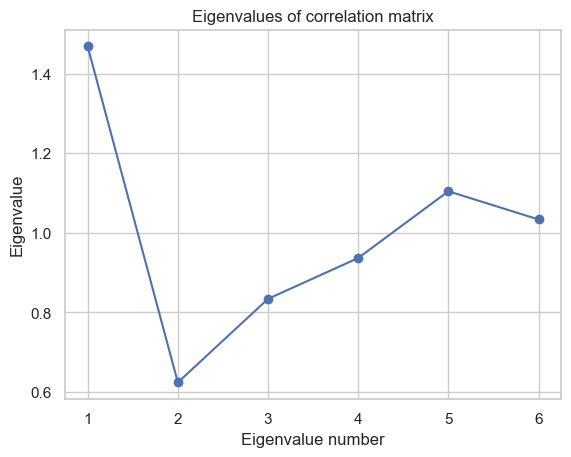

In [420]:
corr_mat_square = analysis_df[['carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']].corr()
eigenvalues, eigenvectors = np.linalg.eig(corr_mat_square)
plt.plot(np.arange(len(eigenvalues)), eigenvalues, 'o-')
plt.xticks(np.arange(len(eigenvalues)), np.arange(len(eigenvalues))+1)
plt.xlabel('Eigenvalue number')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of correlation matrix')
plt.show()

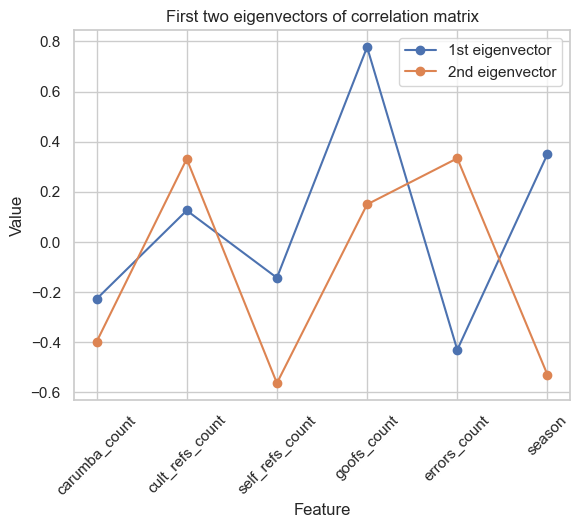

In [421]:
labels = ['carumba_count', 'cult_refs_count', 'self_refs_count', 'goofs_count', 'errors_count', 'season']
plt.plot(labels, eigenvectors[0], 'o-', label='1st eigenvector')
plt.plot(labels, eigenvectors[1], 'o-', label='2nd eigenvector')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Feature')
plt.ylabel('Value')
plt.title('First two eigenvectors of correlation matrix')
plt.show()

## Part 4: Conclusions

#### 4.1 How does demographics influence the rating?

The demographics seem to have very low impact on the ratings on first glance, however some inconsistencies could be noticed
 right away. First off, in terms of just age groups, the age group of people younger than 18 seemed to show abnormal voting
 behavior. On further inspection it can be seen that the votes of people aged under 18 are vanishingly small compared to the
 other age groups or sometimes even non-existent. A trend can be seen then where people in that age group vote mostly either
 very high or very low, while all other age groups have a more normally distributed voting behavior.

Further, gender did not seem to play an important role in the ratings on first sight either, where the 'Male' and 'Female'
 curves are mostly close together. It was however interesting to see that the total rating curve often disappeared under the
 male rating curve. A closer look into that reveals that the proportion of men voting on the episodes is 4-15 times higher that
 of the proportion of women. Despite that it could still be observed that women on average gave an overall better rating to the
 show than men did, and a trend was hinted at that women seem to prefer later seasons while men prefered the earlier seasons.
#### 4.2 Which guest speaker is the funniest?

#### 4.3 How does speaking time of characters changes over seasons?

#### 4.4 What features have the most impact on rating?
It was found that number of cultural references and number of times Bart says "carumba" have slight negative impact on the rating. In addition, number of goofs per episode was found to have strong positive correlation with episode rating. Unfortunately, wiki fandom contained much less reoccurring episode features than it was expected, thus the analysis resulted to be quite limited.

## Part 5: Ethical considerations

#### 5.1 Provide Datasheets for the Dataset
We included the datasets in our repository in the folder Datasets. The original data-world dataset is in the 'data-society-the-simspons-by-the-data' and the scraped csv sheets in 'scraped'.

#### 5.2 How did you get the data?
We downloaded parts of the data from data-world and scrapped the other part from the wiki fandom page. We checked beforehand whether we were allowed to scrap it in the 'robots.txt' file of the website and with what rate. It turned out that there were no underlying constraints to scrapping the data from the pages we were interested in. The IMDB demographics voting was retrieved from the IMDB python api.

#### 5.3 Did you check the source?
The original data-world dataset provides some sources and R-code that was used for its initial scraping, so we can be sure that it is accurate. For the wiki fandom data it was hard to confirm that the data was accurate, because we would have needed to binge-watch a lot of Simpsons. However, since parts of the group were big simpson fans we got the feeling that the data wasn't completely wrong at least.

#### 5.4 Are there considerations about the analysis you made?
Answered in 7.

#### 5.5 Did you have to make decisions that affect the analysis?
Answered in 7.

#### 5.6 What are the limitations of your analysis and your conclusions?
One of the key limitations is that much fewer features than expected was retrieved from simpsons wiki fandom - only 4 appear to be consistently present for at least some episodes per season. In addition, since those features were explicitly written by wiki moderators, we can't guarantee that there was not any bias present e.g., authors reported fewer goofs for later seasons since they expected quality of show would be decreasing anyway.

For the catchphrase analysis a couple of the most memorable characters were picked that were already expected to have a favourite frequently occurring word. This analysis could have been extended by analysing top 3 favourite words of each character, checking their repetitiveness over the episodes and reporting only those that are consistently used. Also, perhaps with a more rigorous NLP analysis, more interesting features could have been extracted from the scripts per episode.

#### 5.7 Who are the stakeholders of your project?
We are the only stakeholders of the project.

#### 5.8 Who can benefit from this project, who can be harmed, who is excluded, etc.?
In general, it is safe to say that simpson Fans can benefit from this project or people who might want to get into to the show and are looking for indicators of good seasons. Unfortunately, non-binary people are excluded from our analysis of the rating for the episodes, because there was no data on them. In addition, scriptwriters of the latest seasons/episodes might be slightly disparaged by our analysis, because we found some indications that the quality of the scripts has decreased over the years and is suspiciously correlated with decreased ratings 😉. But no conclusion can be made on that, since correlation does not imply causation.